In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

con = sqlite3.connect('R:/Semester 5 Fall 2017/Capstone papers/data/amazon-fine-food-reviews/database.sqlite')


messages = pd.read_sql_query("""
SELECT Score, Summary
FROM Reviews
WHERE Score != 3
""", con)

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

Score = messages['Score']
Score = Score.map(partition)
Summary = messages['Summary']
X_train, X_test, y_train, y_test = train_test_split(Summary, Score, test_size=0.2, random_state=42)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
messages.describe()


Score
count  197415.000000
mean        3.184024
std         1.612491
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000

In [2]:
messages.Score.value_counts()

4    60122
5    55256
1    52268
2    29769
Name: Score, dtype: int64

In [36]:
X_train.head(5)


138809    Misleading discription-bad taste
133255                         Very Potent
153199                 Chicken noodle soup
35922                Simple, Quick & Tasty
108589               Tasty but very salty!
Name: Summary, dtype: object

In [37]:
X_test.describe()


count            39483
unique           29763
top       Disappointed
freq               137
Name: Summary, dtype: object

In [38]:
y_train.head(5)


138809    negative
133255    positive
153199    positive
35922     positive
108589    negative
Name: Score, dtype: object

In [40]:
y_test.value_counts()

positive    23098
negative    16385
Name: Score, dtype: int64

In [41]:
print(messages.head(20))

    Score                                            Summary
0       5                              Good Quality Dog Food
1       1                                  Not as Advertised
2       4                              "Delight" says it all
3       2                                     Cough Medicine
4       5                                        Great taffy
5       4                                         Nice Taffy
6       5      Great!  Just as good as the expensive brands!
7       5                             Wonderful, tasty taffy
8       5                                         Yay Barley
9       5                                   Healthy Dog Food
10      5                    The Best Hot Sauce in the World
11      5  My cats LOVE this "diet" food better than thei...
12      1               My Cats Are Not Fans of the New Food
13      4                                  fresh and greasy!
14      5                       Strawberry Twizzlers - Yummy
15      5           Lots

In [4]:

tmp = messages
tmp['Score'] = tmp['Score'].map(partition)
print(tmp.head(20))




TypeError: '<' not supported between instances of 'str' and 'int'

In [6]:
stemmer = PorterStemmer()
from nltk.corpus import stopwords

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens, stemmer)
    return ' '.join(stems)

intab = string.punctuation
outtab = "                                "
trantab = str.maketrans(intab, outtab)

#--- Training set

corpus = []
for text in X_train:
    print(text)
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    corpus.append(text)
        
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)        
        
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#--- Test set

test_set = []
for text in X_test:
    text = text.lower()
    text = text.translate(trantab)
    text=tokenize(text)
    test_set.append(text)

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


from pandas import *
df = DataFrame({'Before': X_train, 'After': corpus})
print(df.head(20))


prediction = dict()

Misleading discription-bad taste
Very Potent
Chicken noodle soup
Simple, Quick & Tasty
Tasty but very salty!
Chew-lotta bone
JUNK!!!! Brookstone is not helping with warranty issues...
Dog chewed through the jug itself
My cat went nuts for these things.
Sage Tea helps with night sweats
Great bar, but don't expect fruit in every bite!
Another Brand is Better
Great alternative to peanut butter!
Interesting taste
Great way to clean teeth
Disgusting
Healthy Drink for kids and adults
WhoNu? Chocolate Sandwich Creme Cookies ~~ DELICIOUS AND HEALTHIER THAN THE MAJOR NAME BRAND !!!
Peach Cobbler mix
super delicious,easy baking, scrumptious eating
Worst Junk Food Ever
Very good product for HCG users
Literally Stink
If you Love Arnott's Tim Tams...skip these
nice gift!!
Delicious!
Sweet and Tasty
Yum!
Gives drinks an odd taste
quick, easy, healthy, delicious!
Sweetener lacking
Too Sweet
allergies
Nutri Dent dog treats
bad batch?
Good for training, but what about the calories?
Wow hot and awesome!

Keeps them busy!
Aunt Gussies Highfat Cookies
Cats love it!
Good coffee
Hated it!
Versatile
"lil salty but good"
Good French Roast
The Perfect Brew
Love it !!!
Inedible -- So bad I threw out a nearly-full box.
Makes me the villain
Good flavor, interesting texture
The taste is not what I expected
Truffle troubles....
Don't Waste Your Money
Double Spice Chai
Brings back good memories
Good Brown Jasmine Rice!
Found a hair in the cookie, brrrr...
Good product
Best flavor, hands down of Popchips is barbeque!!
My kittens go nuts
YUMMY!
We are open minded but this doesn't taste like bacon or even close.
Great! Wish they were more affordable!
Tasty, great for camping or fast breakfasts
Way too expensive!
Unfortunately an Irresponsible Company
Walden Farms Calorie Free Balsamic
A decent price and quality
Good product
Follow the directions
Household favorites!
Too tough
All Bran Flakes
Just like I remembered.
Not for first-timers!
It's great, but sometime's not.
Not my cup of tea
A Penny Saved, 

mmmmm
Disappointing taste
Very good substitute
My dogs hate them.  Won't even touch them.
Reasonable But Not Great
so good!
Good product, bad price
Love the tea...not the price.
great coffee but
Shipping Charges
SOOO YUMMY!!
Which is it? "14oz box, pack of 14" or "Pack of seven, 14 ounces each (total of 98 ounces)" ?
ALMOST gave this a three...
STALE
Easy to make, keeps me full, but the taste could be better
Its good!!
Great flavor for snacking
great
Happy customer
Cats aren't fond of it
YUMMY
Bitter
Too sweet for my taste
Decent Coffee, Great Price
2 Stars for the price.
Convenient and fun
Tastes terrible
dissappointed
This is definitely a big gamble.....
Great Nutty taste!
High quality, organic!, a little flat
Dog absolutel loved them
Flavor good but need variety
Tasted Great... For About 3 Weeks
Good alternative to regular peanut butter
Davidson's English Breakfast tea
Just not as cute as I had hoped
Crust is Terrible
Product of China.
Bad
Not Great
I love these bars!
watch out...
"

I love couscous
Always fresh
Genuinely unpleasant tasting
not ready to go
Bones
very greasy...yup, name is misleading
Good Stuff
Wrong item listed!!!!
Do Not Buy: Chinese Treats
Great healthy snack!
Closet Slim Jim Eater
Peach Tea!
Grape Laces Rock
Overhyped and rather tasteless
Zesty flavor, but watch the price!
Cats aren't fond of it
Love it!
Love the Hot and Teriyaki
simply the best!!
Over Priced
good and not full of chemicals
so bad I had to write a review
Disappointed...
Moldy Product!
Excellent for the T-Cup
We won't be making the Switch
Smoked Reigns!
Not what I expected
Greenies Dental Chews
Bold and Smooth
Bob's Red Mill Gluten Free Whole Grain, Steel Cut Oats, 24-Ounce Bags (Pack of 4)
Sage Tea helps with night sweats
Cat owner
Could not taste much peanut butter
orgasmic
almost perfect
Delicious.
Grotesque! Maybe I Got a bd can but ick!
Palatable, attractive, but short-lived chew
Decent...
Not sure how to feel
my dog loves these vitamins!!
For the Coffee Lover, a Great Altern

Nice Cookies
Excellent
Corn tastes very delicious, even without any salt added
MADE IN CHINA!!!!!
Completely overpriced
Great product.. but count the k-cups
really dissapointed
Mallomar
Good Stuff
CET HEXtra Premium Chews X-LARGE  by Virbec
Better than your average instant coffee
Product is Awesome / Amazon's handling of it not so!!!
Great Coffee
Tasty!
Cats are Carnivores
If you like generic coffee...
Not Potato Chips
Perfect chip in every way, but a terrible bag!
Crumbs
Teddy Graham's Competition
Ordered the item on the 7th.. wasnt shipped until the 14th!! WAY BEHIND THE ESTIMATED ARRIVAL DATE!
Difficult to use in colder seasons
Filler food is empty, leaves your cat always needing more
Nice ginger bite but a bit too hard for my tastes
YO USOULD OF SEEN THIS
Previous reviewer is on Crack
Country cut Beef Jerky
soft ice cream mix
I loved it
Adorable cake topper
Great tea helps nursing mothers.
Great tasting Tea
Dog loves 'em but they don't last long
GOOD TASTING
wow what a rip-off
Dogs

Good product
Now brand stevia is 1/5 as sweet as Kal brand
Worth every star!
Fresh Candy, Great Taste, product weight not disclosed...
Spoiled Yogurettes wasn't what I seeking to buy...
Not a "Chew", its more like a Jaw-breaker!
High quality cinnamon purchased through Amazon
Perfect for stuffing them into kongs and other toys!
Not your grandmother's condensed soup!
Love These Snacks!
Fantastic, Love the Larger Bottles
Quick shipping to US, a bit stale
Not a Bargain
Great toy for food-oriented dogs
Yummy, natural, organic treat
Not very good
Notification of Cancelled order 2 weeks after order was placed
not worth a nickel
No upset stomach
What's not to love?
Great product, terrible packaging...beware...
The worst snap-lock reseal ever made?
Bought on a manager's special and hated it
Nuts to Kirkland's pecans
No indication how much you are buying
My dogs love these!!
Good flavor, one of my favorites
What you'd expect, decent pears in a 'heavy sauce'
More of a treat then something to keep

Great Tea
Hot & Sour Egg Flower soup Mix
product has changed for the worse
Terrible product
Kicking horse coffe
Pretty delish!
Card not delivered with gift
Tasty but Burnt and Salty
Morning Delight
kids like it
Very good product and taste
SUCRALOSE
Favourite
Kitchens of India Ready To Eat Pav Bhaji, Mashed Vegetable Curry
Perfect drink for a chilly day
Ultimate Snack Food
Decent but needs more paneer
Great Flavor!
Wrong product!
Am i the only one who these give gas?
Not an Italian Sauce
delicious sprouted sunflower seeds
Awesome! You can get this online!
YUMMY!
disgusted
Best Earl Grey I've ever had!
Something Special
Good Coffee But Poor Delivery
Like Oreos, but Don't Taste Good IMO
Obey Training Treats
Freeze dried coffee
My dog loves these!!!!
Good Stuff
Popchips
Pair it with Clear condition and your hair is good to go
My family LOVES these!
Exactly as advertised
Doesn't taste good.
jerky strips
NOT metallic
Good quality, tasty, but too sweet for breakfast
Strong "ashy" taste, needs

These are really tasty jelly sticks
do you like water?
Bad beef jerky
Tastes delicious!! Love them.  Not healthy as package says though.
My Cats Love It
GOOD PRODUCTS...!!!
Just like the real thing
Good Stuff
Something is different
Best coffee I have had yet
Price gouge?
Throw up flavor?
tastes familliar....
A Great, Great Tea!
Best Coffee Ever
Treat wheel is Amazing
My Opinion
Delicious - very convenient
Formula Changed
NOW Cocoa
Moldy! Full of a white fuzzy mold!
Best BBQ Sauce in the World! And I Mean It!!!!!!!
Directions and Nutritional Facts Incorrect
Yuck!
My dog loves it.
The Cats Love This - But There's Something that Bugs Me
Good formula but fishy!
A promising coffee!
Really is bird seed. Don't buy it!
horrendously expensive
Very Good
My dog likes it a lot but the quality is not 5 star
Digestive upsets
Not Worth the Price
what!!!???
What a great combo of flavors.
The Smelliest Stinkiest Stuff, Can't Get it Off
really makes a difference in taste
Tough To Digest
item says "Lucy'

Poor Performance
It is great cat food, my cats love it!
Not as good as I remembered
Not as advertised
Doesn't feel like food
Excellent chip!
wonderful
a better snack than most granola bars
Great on-the-go snack
Average Popcorn - Nice size bags
Beach Granny
Whole Grain Cereal
Mix & Match a Great Blend Has A Future
great tasting
Absolutely wonderful
Delicious!
Eggling
I want to barf.
Waaay too salty for me
Dented String Beans
Delicious, Quality Popcorn
Bad taste, but helps you fall asleep
Strong but not Bitter
Not Good
Great spaghetti thickener
Best so far, but no longer offered in the "Subscribe & Save" program
Great quick sauce and snack
Love the flavor damage to cups un-acceptable
not as good as Cafe Escapes
Decaf Never Tasted So Good---5 Stars!
Would never buy again
Good product
Can't be beat!
NEVER Again!!
weak
Terrible tasting, waxy Reese's so called Milk ''Chocolate''
Drastic cost increases!
Maybe I should wait a bit before reviewing this...
delicious
Near Perfect
Baby is less lik

Smaller & thinner
Panettone Cake should be an all year round product not just for Christmas!
I'd probably return it, but it's less costly to keep
My dog hated it
Go for Pinhead Gunpowder instead...
Great alternative to Green Mountain
Tasty if a bit dry.
wonderful hot cocoa
Hardcore German Gummi Bears (made in Hungary)
THIS IS NOT A COFFEE BEAN/TEA LEAF PRODUCT
Tastes like death
misleading product info
Watch out for rocks
pretty tasty
Good bone, but not for larger dogs
When you need to diet..
Where's the Orange?
High quality yummy treat for dogs!
great taste
Disappointed
AWFUL!
My Beef
Skate with the Big Boys...
Very good tortilla strips but packaging is poor.
5 stars for item; NEGATIVE stars for packaging
NO GOOD
Nice crunch and good flavor
Excellent Product!
Hard to find, but not on Amazon!
Very Pleased
love that these are yogurt flavor!  my dog loves booda bones!
Reeses sugar-free peanut butter cups
Chia Fresca
coconut cream pie -- 100% PALEO
Love this tea!
1 gram of trans-fat per 16

Effective protein & Fiber, though not versatile
I already ordered more of this sauce
I was reluctant to try it, but PLEASANTLY surprised!!  =)
No Hazelnut flavor
not a time or effort saver
Graham crackers good enough for Mommy to eat too!
Pretty Good
Product was fine, preference is for milder coffee
Wrong Information
Yum!
Great tea.
Pretty tasty and decently spiced. . . .
Tastes nasty
It grows on you
Over priced and not that good
enough salt to gag you.
Small
Rancid, bitter oat bran
this bag is a fantastic value, and delicious too
All natural and delicious!!
Good Soda
Good popcorn, poor caramel
SLOW SHIPPING - LESS FILLING
I liked this when I could get it.
Breadcrumbs
Coffee pods
duck flavor doesn't work
Grape flavor is horrible; no energy boost at all
Great Product - Use care Ordering
Very ordinary product
Apparently we like peanut butter...a lot!
dangerous to your dog's health
Coffee, chocolate, and peppermint flavors in one handy little can... what's not to like?
Ron C
Hard as rocks

I love this tea!
It is better than I expected
Royal Canin--Not the crown jewels of dog food
Delicious and low calorie
These are undercooked chips.
Spreadable and aromatic, but lacking vitamins
Not very good.
Rotten Peanut Butter
Good quality
Order fulfillment/warehouse problems?
Delicious and easy
like mom used to have
Horizon Organic Plain Organic Milk, 8-Ounce Aseptic Cartons (Pack of 18)
Overpriced and Unsubstantial
Not healthy with BPA!
SHASH PREMIUM PEACH BLACK TEA
great bars
No taste
Product arrived in poor condition
DO NOT ORDER
Poor packaging, damaged cans
different tastes
Easy cooking, sub-par taste, interspersed plus and minuses
TOXIC hexane still in it!
Good for baking (with a little trick)
Taste great, but a product of Vietnam.
Dissappointed UPDATED!!!
delicious coke is for the broke
YUMMY!
The Pup loves them
Hariubo Gummi
Unimpressed
bad tasting coffee
super tasty
orijen dry dog food
I really wanted to like this, but I can't
colors didn't turn out like expected but was pro

Real Graham Crackers
Fabulous!
Very Tasty!
Sage Tea helps with night sweats
Healthy and great tasting!  Kid approved!
Great stuff!!
Tasty, crunchy! I like it, but...
Gluten Free White Cake Mix
Clever little tool!
Do not order this product....
Old time favorite that should be less expensive
Space Saver
excellent-strong coffee
The CHEEEEEEESSSSEEEESSSSTTTTTT !
Chews are not safe for all dogs
lovely gift
Should be called Natural Drano
No Flavor at all.
Literally Stink
Great Deal and Great Coffee
Misinformation in the listing
Only gave it 4 stars because
A great cup of coffee
Ahmad Tea Pleases
price gouging
Great product!!  What's with the price???
Assortment really lacking.
Actual theater popcorn -- this is it
one of two on the market
This toy has an 18 hour life span
Excellent product considering
My Cats go GA-GA for these Treats!
Shipped half the order !
Health Potion
dented can
Absolutely Disgusting
wonderful Marzipan
YUCK
too expensive comparing to the local stores
Best price you'll f

So weak!
A great backup from scratch
Coffee and Tea creamer
Better than Gluten!!!
Ancient Harvest Quinoa Pasta
Not so great
Bitter and Awful
nice organic white
Better product description, please!
Good in Smoothies & Ice Cream!
Greenies Dental Chews
Doogswell Happy Hips
USE THIS ON EVERYTHING!
About right...
nothing special
should be 18.99
Mold
Excellent Product
Nasty With An Aftertaste
Great Tea at a Nice Price
Would not recommend to buy from here!!!
Tazo Zen Green Tea with Lemongrass & Spearmint
Dosen't taste like tea
Poorly marketed, bad labeling
Great Idea!
Shipping cost more than the product!
DELICIOUS
I really wanted to like this but..
Awesome cereal the whole family loves!
Morning Glory = Yummy :)
Excellent!
Mallomars are my favorite cookie. But mail ordering them has its problems.
Kellogg's Granola w/raisins
DOES NOT CONTAIN COCOA BUTTER!
No Fear
I Loved the Cinnamon Snaps!!!!
Amazing taste with much less sugar and calories
GREAT taste, but priced too high!
my cats favorite is t

great eatin'
Find "hard to Find" tea
Delectable!
Quick Chew
bad value for product
A little too sweet but still delicious and great for GI health.
shaky
Not for me
Worthy of a subscription
Help, My stomach gets upset with this tea.
Looks like tropical fish food but my dog woofed it up
Great deal.
Great coffee flavor...
Stay regular!!!
Too sweet for my taste!
Cat's favorite
VERY powerful taste, not a snack
Pepsi: Why did you mess up throwback?
Great stuff
Reformed Coffee Drinker
Excellent GOURMET Marcona almonds in a HUGE box!
Oh it was AWFUL!
Acceptable taste, went moldy fast
Not "too" bad but not great
Best.Caramels.Ever.
my cat loves these!!
Ick- don't buy from amazon
One of the Good Ones for the Keurig
icky
The snack that's good for you.
Workout Chips Alternative
Healthy Dog Snack
Not very strong
Dog loves them
Lammy Bites are the Best!
Don't settle for these!
My Mouth Loves These!
College student loved this!
Horrible
OMGoodness Deliciousness!
Not Ground Coffee
Tasty and healthy!
Lim

False Advertising
BEST EVER!!
Nice, distinctive tasting treat for cashew lovers...
4 Stars for price and taste
Excellent Product!
Picky eater loves Beefeaters
Very convenient, good taste, a tiny bit too sweet
warming
W-E-A-K! NOT WORTH THE COST!!!!
University of Victoria Rabbit Cull
Great rice
Not loving the shells
Simply amazing!
Bags break at seams
always something new and different
Not fresh & Tooooooooooo salty.  Excessively salty.
Marginal
Ridiculous price for good product
My son's favorite macaroni!
Our dogs love these salmon & veggie treats!
Just the way I like it!
Do not order this product....
Boring
Our favorite whole wheat mac 'n cheese!
We LOVE these
AWFUL!
Thanks but no thanks
Waste of money
CAVEAT EMPTOR!  TEA LACKS FULL FLAVOR!!!!!
NOT the same as original
IN A LUNCH BAG...REALLY?!
It's really not bad
Best Hot Chocolate ever
Almost, Not Quite...
NOTHING
These are delicious!
My Lab just ate the whole thing!
Well, at least they have vitamin D.
Vicks Vapor Rub
Where's the ch

$136 for 12 boxes?
Very Good!
Really yummy licorice!!
slim jims no good!
Excellent Product
I hated it, but Mom loved it.
russell stover
would buy again and again
COMPLETE RIP-OFF ! ! ! ! ! ! ! ! ! ! !
Yeach!
Good but Beware!
Not good, couldn't finish my cup
Made in China ~ all products!
Not Chinese restaurant-style hot mustard
I'm addicted
Good popcorn, great packaging and service
Good night sleep
Missing ingredient!
Great Taste - Horrible Price
Excellent product, very addictive, great flavor 3 varieties
T-disc latte
To make a gooseberry pie
Good coffee, but not at all Creme Brulee-y
20 Word Review
Best wet food!
Rice for my wife
cookie writing pens
Great cookies!
too expensive
Tasty!
Good flavor and wont break the bank
Can you say FRAUD!
good, but better first time
Excellent Taste
Good Syrup
Pricey but worth it
Rich Tasting Coffee
Filler food is empty, leaves your cat always needing more
Good- Mild, pleasant flavor, good for guests
Clean plate
My Cats Will Not Eat the New Formula
Enjo

Recently arrived in the mail
Not as expected
Terrible
Too sour!!!
Yum~
wouldnt let master give the dog food away
Disappointed
Misleading Flavor Name
flax seed
You Really Should Try this if You Like Chai!
Not worth it
Lower acid, lower caffeine but still a deep, rich taste every time
raspberry truffle lack the rasberry taste
Laxative Lollipops
High levels of Arsenic
Works great!
better choices for your loved one
Way too sweet for me!
Perfect for Training
Great food, and perfect sized cans.
special salt
You Lost Us At "Corn Syrup"
2nd box was horrible
Spicy World Moon Da
i'm obsessed...
High Sugar + Acidic Taste =  Not Ready to Make the Switch
Good tea
Love These!
the best chips ever
Nice dark roast
Good Brew
Every can dented even though package was intact
Great taste and size
Too much for watered down coffee
Good eatin'
Great taste, lousy cup
Horrible smell, even worse feeling
Good Cereal and Good for You
better than bouillon
Not for strong chewers, part II
Great Immune Booster, Yummy a

Could not get rid of the lumps
Wolfgang Puck Keurig Cup Coffee
I am crazy or....
Close call!
Not the Devil Dogs of old
Bitter, Burned Flavor. Major Aftertaste.
Too confusing for my dog
powder
Not a fan.
OK, this is not a Jewish company alright?
best microwave pork rinds
Shameful!
Seriously?
just run of the mill black tea
Lavender tea is o.k.
Tasty
Love These!
Love it, but
Not What I Was Expecting
cat food
Great single cup coffe
Good Coffee
Disappointed
good
The easy way
My cat LOVES this!!!
It's all WRONG!
Common truffle, just this, not worth the price.
She Loves It
smelly
Delicious and Handy! (And ridiculously cute!)
Barely edible
Too Sweet, does not mix
Stash Tea at it's best
Amazon shippers stole a pack of my cookies!
Excellent
Manna from heaven
Total Junk Food with "Organic" Wash
Delish
GOOD!
Tastes like cardboard!
Gave it a try, but not as good
only a hint of flavour
Blah! What honestly happened here?!?
Weird taste
My 15-mo. old son LOVES these.
Mine didn't arrive in anything clos

Great find
Not as Stinky as Others
Tasty & healthier substitute for junk-food chips
not very fresh
not very good,
This is a first for me
They're OK, but not great.
Great pick-me-up for the late afternoon slump
Yuck!
Not worth the money
VERY Bitter
Christopher Ranch...
Dries out skin, causes heavy irritation, hard to undo its affects
Above and beyond expectation
AQUA BLOX - GOOD Storage Size.  BAD SHIPPING Box
Amazing brownies
nice working yogurt creater
Yuck!
NO to POWDER--Bottled Spec K2O  water strawberry kiwi tastes better
Meh
Nong Shim Spicy Chicken Noodle Bowl, 3.03-Ounce (Pack of 12)
The way Pu-Erh should be
Hooray!
No longer a stick--more like a crouton
Needs milk
Beware
Best Green Tea Ever!
Shoumei White Tea is okay
Not Great
when you want it fast
won't give 5 star because it's too expensive
Not  so tasty cheese rounds
Nothing but crumbs!!
BAD INVENTORY MANAGEMENT
Not really a gift pack.
The Best Gummy Bears!
good stuff!
Good and good for you
My oh My oh My I love this bread!
P

A winner in our home
Excellent
Waited a month for these and they weren't that great
Best Xylitol gum
That the wrong picture of the product
ONE bag!!
Too tough
One and Only
great flavor
Glad we tried, has made a difference
Raisin Bran Cereal
Nothing Bad Just Too strong for my taste buds
salt and vinegar chips
poorly sealed
Tea for Two
Love the Tea Biscuits
Reduced to 99.9 cents per cup
Buyer beware
As advertised, nice kick
It is darn good and easy
Good food
A tang that packs a punch!
Very strange flavor
Great toy but poor design
WEIGHT GAIN!!!!!!!!!!!!!!!!!!!!
Beware of allergic reactions
I didn't like them
Easy, light, and inexpensive to eat on the go or add to a salad
No snap
Wonderful!!
Crisp, Cool, and Totally Hydrating
On time
I am so disappointed
Coffee
Not a good product
Code date on product close to expiration.
STRONG STUFF!
Organic Vegan treat
Disappointed with the Packaging
Not as described
Super high quality for the ones you love
Alas poor Clark Bar, I knew thee well!
Awesome

Best I could ever eat.
Best Pop Chips Ever!
A great flavored drink
Not my favorite GUM!
Cats Love To Nibble on Wheat Grass
Not Worth the Price
Approved by three Miniature Schnauzers
I Won't Go Back To Black
Solid Gourmet Cup of Coffee
If you like grounds in your coffee
ONLY CAUGHT 1 FLY
Loose stools from beginning to end
Best thing since sliced bread
Does the job
Very Satisfied Customer
Wonderfully disgusting (dont pay more than 5 bucks for the 2 pack)
Not bad at all..
delicious peanuts in ridiculously weak packaging
keurig coffee
Great Tasting Tea!
Organic Medium Roast One Love
Great purchase
Never got it
Not for me
Maxwell House Has Always Been Our Favorite Brand
If you want dark green color, buy this!
Delicious and filling
Perhaps Brewing Wrong?
Pleasant beverage, convenient format!
cheaper to buy this way
plant was dead when it arrived.
Unauthentic tasting, just an 'onion soup'.
Sweetened cardboard
Tastes great!
Hearty but rancid?
gluten-free crackers
natural vitality.  natural cal

Used to be excellent, formula changed
tasty tiny cookies
Dangerous charger
Choking hazard for 6 month old
Pretty good if you don't like meat :)
Poms love chicken dumbells!
Excellent Variety Pack
It's pricey, but our picky cats like it.
Pecan flavor is super!
Major disappointment!
Overwhelming lemon
Yummy and pretty!
Gastric Sleeve friendly
The Jar was barely 3/4 full.
Too Much Sodium
Not what I ordered
amazingly delicious!
Good option for the overly health-conscious
Twenty Bucks???  Are you INSANE????
Fast growing, but not long lasting
GUILT-FREE PeanutButter!  Who Knew?
Cesar canine meal is one of the few dog foods she will eat
WOW! Smoky With A Nice Slow Burn
inconsistent texture but nice flavor
Ordered beef bites, got these
Apple Crisp review
Watery and flavorless
Calories don't add up!
Price gouging to a ridiculous degree
not ok IMO - picky about ingredients
So little for the money
dry meat and short expiration date
nice rice
Carb-Smart Tortillas
Superior Soy is superior
Less plast

Bar NONE! The best baked....
Nom Nom Nom
Good Chocolate, But a Bit Pricy
El Yucateco Achiote Red Paste
Personal preference
Starbucks VIA Italian Roast
Too hard to chew
YUMMY
DO NOT EAT WILL CAUSE YOU THE WORST GAS PAIN EVER
Excellent Jerky
Pretty good berry soda
tasty
Must mix it with fruit or other tasty baby food
In-laws loved it
Excellent Maple Syrup!
Salt Lick
Excellent Product
Suggested by Dr. Oz
Too Much Sugar
bitter coffee
Soy that doesn't kill me
Fruit and nut
nice flavor
Nice and strong - the way I like it.
Too Much of a Good Thing
Don't be fooled into thinking this is a traditional Japanese substitue for dashi.
It sinks and my dogs hate it
CONTAINS SUGAR & CITRIC ACID
Pretty much a perfect all-around drinking coffee
Great Weight Loss tool
Good value over store bought.
Good, but strong
Filter collapses
Good product - better price elsewhere
La15cats - Midel Gluten Free Chocolate Sandwich Cookies
Baby White Popcorn
These are gross!
Yay! I &lt;3 Peanut Butter, and now I can actua

reviews were right....
VERY DISAPPOINTED
Good tasting and pleasantly crunchy
Lobster? Chowder
Yum!
Yummy Sugary Fiber
YUM- like a perfect Rice Crispy
If you want fiber, don't buy!
My two Dogs go nuts for these
My 3 dogs loved it, when it was in my budget.
Kettle Chips, Sea Salt
Cappacino
Not for mine
Never again
Awesome Service
Sweeter than sugar
good product , shipping time long
Weuva Mideast Cat food
Really gets those juices flowing...
Will not buy this product again from Amazon
cottonseed oil
Cashews to die for...
Surprisingly disappointing
Too bitter and smoky
These candies are delightful
Fun new flavors for my candies!
Number
Terrible
tastes like sweet red water
Beware many reports of toxic effects from Navitas
Biscotti and Breakfast  Coffee
Chemical smell and taste, dented cans
Great for a buck
The Best I've Found So Far
Packaging is insufficient; can breaks during shipment
too rich for my dog, gave her black poo
broken
Rich Chocolate Mix
You can definitely taste the salt & vineg

Tasty popcorn
Great Value!
Medora Snacks - Cheesy Jalapeno
My wife and I love these!
Successful experiment!
UHMMM
caramel
Not the JuJubees I remember
Pretty Good
Stinks to high heaven
BEWARE!! The shipping costs more than the product!!!!!
Loads of fun
These really are fresher.
Think Welch's Grape SODA but healthier
Not pure Kona and way overpriced
Yuck!
Best tasting sardines
Taste terrible and didn't help me lose weight.
Wonderful Product
Great product, great price
Totally a great balance in flavors I expect from an Asian dressing!
Price is ridiculous
Amazing!!!
Great crunchy snack
K
I won't buy it again
Not habanero-y at all, but still insanely addicting
Popcorn...AAACCCHHH!
Life Saver
Tested good
DO NOT TRUST THIS PRODUCT!  MADE IN CHINA
Just like the original bisquick
Not what l expected.
SLOW SHIPPING>> PRODUCT IS VERY WEAK.
Great product at a great price.
OMG! Sooooo gooood! Yummy milk-free and wheat-free snack!
Wonderful cookies
Pretty good wholesome
Recommended Tea for small cup

Great for on the go!
Meh
Don't Buy This, Even If You Really Want to Ignore the Bad Reviews
Bringing Back My Childhood
Company sold out. No different from regular grocery dog food.
Good rice- but
A Nice Surprise!
Good stuff!
Best milk chocolate available for Keurig
Bully sticks,
Didn't satisfy the void of baked salt & vinegar chips for me
exactly, down the molecule, the same formula as Wal-Mart's Organic baby formula
It Works
My new favorite snack
great product
Delicious!!
Too sweet for my taste
They aren't 17 oz. bottles
Good product
jet fuel
Might make your plants happy if you gave it to them. Or it might kill them. Not sure...
Burns Sensitive Skin
Simply Amazing flavored nuts!
Misrepresented and Upset
Great snack
Very Good!
worth the money
Dog Pill Joy
Should come with a warning on the package.
Watery and not sweet and tangy
Yuck Yuck Double Yuck!
Interesting chip, but maybe not the best for salsa
Excellent cup of coffee
One bottle came broken
My dogs love these things!!!
I agree wit

Tastes a little bit like Nyquil
Cravings Place All Purpose Pancake and Waffle Mix
A-1 NEW YORK MARINADE (6 PACK)
Convenient, healthy treats for training
Bisquick Gluten Free
Good Tasting Sugarless Gum - Recommended
I am a ginger fanatic and I liked this.
GOOD PRICE BUT NOT THE BEST TASTE
Not So Everlasting
The can is only half full
I can't believe I spent so much money on this
Cine-Magic Popcorn
NOT good in presto percolator
yummy but shipping not so great
Tastes great, wish it were healthier!
Just right for a light lunch or snack on the run
Wrong bag pictured
Good Flavor, Limited Ingredients
Cats won't eat.
Great treats
This is a rip off
Manuka honey  for indigestion or facial masks
I love Senseo
Got Me Running
Delicious Haldiram's Soan Papdi
You really go when taken as directed.
Twinngs China Oolong Tea
Wasn't a pleasant experience!
Excellent source of fiber that tastes good!
Just got my Beaba!
Good Halloween candy
Perfect
VERY DISAPPOINTED
PUCKER UP
If you like Rocamojo French Roast

Everlasting Treat - Barbeque
Very good popcorn.
Great Find!
Bleh!
Definitely not true posole corn and not what I expected...
Protein, tastes good and no gluten.
Tummy Troubles
Good, but...
Horrible flavor made my infant vomit causing setback in recovery
healthy snack
Has a foul odor
Ehh.
VERY MISLEADING
Very Good Cat Food but...
Yummmmmm
bland
Truffle Oil?
Love EnviroKidz Bars!!
What A Bad Trip!
Insanely yummy
Where's the Bergamot?
Hazelnut (Filberts) in a fragile crescent shaped tea cookie.
Best Chips Out There!
Beetlejuice Beetlejuice Beetlejuice
Muscle pain
Caribou k cups
My Error
Great Product, but item near expiration
Not Good
CAN'T COUNT
AWFUL
25% juice!!!
Realized its Small
received fast
Now there is no problem with the shipping or how it was packed!
Good Ready To Eat Meal - Recommended
Hard to find
one of my favorite candy bars
Sweetened coffee in a can
Far Too Acidic to Be Marketed
A Perennial Favorite!
Not so perfect tea
I don't get all the bad reviews...
Best tasting energy 

Great substitute for homemade...little sweet
Used butter added more chocolate chips and
Costco Less Expensive
Crystal light on the go
Good Stuff
1 star for price, 5 stars for taste
Yuck. No chocolate taste.
cat food - organic
Low Carber In Love With Chia
Puppy likes it!
Pleasantly surprised
Is not Efrutti brand
Glutino's Version Is Better
Excellent
Great for dogs with food sensitivity!
Oh my God the SALT SALT SALT! And NOT RETURNABLE!
YUCK
Delicious decadence!!
AWFUL
like salt
Great Rice Cracker treat
Falls short of expectations
Ignored by my dog
Danger!  Step Away From The Ginger Lemon Creme Cookie
Tastes primarily of lemon
garden pest deterrent
Wonderful Chistmas gifts
Gets an A+ from My Doctor
The Best Earl Grey Tea I've found
AWFUL
Not worth the money
Mango Macadamia - Strange taste
Tastes Great - Horrible Price
I love Koma
Awesome, for what it is...
Good cup of decaf for the Keurig
How can something 'Organic' have Pesticide in it?!
Great Coffee
Yummy
A unique nut that bites back
J

Great quality. Heathful product.
Deceptive packaging
Great for dogs with sensitive stomachs
My son and daughter hated this product
Cats are Carnivores
Dusty
Great!
YUMMY!
Okay, Not Great
Put this on all your food ;-)
Great cat food
I burn through this stuff way too quickly!
Best EVER!!!
AWFUL
k-cup
Cheesy Bean and Rice Burritos - Yum!
As fresh as you can get without being in the field picking them.
Not as good ... check expiry
OVERPRICED
tasty
Love the whole grain and taste, but a bit dry, and the oats flake off
It's really salty...
super spicy, difficult to eat
Disappointed
Nice idea, terrible execution.
An Excellent Breakfast Blend
This is a great product.
one of the best
Maltitol is toxic
Cardboard
Good flavor, Good combination of spices, Good ingredients.
Very Good!
Very good blend of primarily green tea
Try this, it might become a staple!
Juniper Tree Bonsai
not a true variety pack
Wonderful Flavor
Peace of mind!
Bitter Ginger, No Lemon...
Need to know how many in case
Great pantr

Delicious!
Good Stuff
Moldy, Awful, Terrible, Dreadful, and 100% preservative free!
Nestle Hot Cocoa Mix
Great creme rinse
Engineering flaw
Moldy
Perfect
Hydrogenated vegetable oils?  No thanks!
Crazy!
Very Good Conditioner
poor packaging
I trust this company
Disgusting!
One of my favorite tea brands!
Too many calories and too strong a taste...
Chili-choco-riffic!
My Animals love Greenies
not really coffee
Bogus Marketing BS
Tasty Protein!
Not Good
Total rip off
Expired Food Items
A Great Present for an Italian Dude
From concentrate
Price has almost doubled in less than a MONTH......
Awful experience
Get them by the case!
Traditional Mate
a gift well received.
Not Great, but OK
Worth the Price
Oodles of Noodles!!
YUMMY!
Would not buy from again
Beware - Made in China
I did not like the taste!
the babies love it
a good tea, hot or cold
Tasty and Healthy
Fondant Colouring
great tea!
Great taste, doesn't dissolve in iced drinks
I AGREE - BAIT AND SWTICH
chips were stale, but my money was 

This is great!!
Spice
Easy to use - could use better labeling
Damaged and odd taste
The cereal is stale
LUCI  likes them
Great Product !
Good, but try the Extra Fresh flavor
Magic Indeed!
Krafty
Eh.
Great tea, great price
Not authentic spiciness
Disappointed
Not real honey
Do not order this product....
bad tasting coffee
the boys who eat everything won't eat it!
no substitute for authentic indian cuisine
Welcome Holiday Gifts
Carmel Corn (Crunch 'n Munch)
Brown Sugar -- Really?
Lemongrass and Mint
Soda Stream My Water Flavor Essence
Mush, water, and not processed?
the best pizza crust mix ever!!!
1 out of 3
meh!
decent but....
Not Bad
Don't drink if you are pregnant!
Unpleasant Grassy Taste
Nothing beats Haribo
OK taste but surprise on last pack of white fuzzy
Amazing smell, good flavor
It was - Ok...
Taste great but very expensive!
Great Stuff
Just as advertised
best of the brand
Milk chocolate wearing a dark chocolate label
My dogs didn't like them
Finally!
Great Product, Great Price

Finally, a K-Cup that is strong enough and truly bold.
PRICES GOING UP, UP, UP, DOWN A LITTLE
Red Caviar
I'm Spoiled!
Not my favorite coffee.
my cats love this!
never been so sick
great tea!
Not actually Jesus!
Bitter tasting
chewy bones
Great stuff!
Free Sample Was Delicious
Jet Fuel K-cup
NO Mango! No Banana!
Quality dog food
great
The next best thing
Crispy, Tastey Crackers on the Go!
Great Product.
Yummy
Why the increase?
White Pear Chardonnay
Excellent tea
Delicious Granoloa
Two Thumbs Up
the best olive around
Not all that I had hoped for
Why don't they carry the 32 oz package?
Stash tea
Sent my blood sugar through the roof!
Don't get them!
Yummy
sticky rice pot
Holds a lot of K-cups
NASTY
Yuck!
Zico Pure Premium Coconut Water - Natural
Surprisingly a good cup of coffee
I missed you my friend!
Item Good...Description and Price, Not So Good
Nice!
Gluten free bisquick
Review for phillips espresso machine
Green Mountain Breakfast Blend
Proof that Gluten Free can be GOOD!
Spiders
Pet 

Astronaut Food
Delicious!
Nasty Taste
Fabulous!
Great if your cats love variety
Healthy and easy to prepare.
Don't buy for Feline Pine litter
too many peanuts
Our 3 dogs love greenies
Good gravy - mild taste
Like the thinner size for my smaller dog
Best Dark Roast coffee you'll ever drink!
RELAX WITH KA ME
Not worth the money
Great tasting coffee
If made in US it would get 5 stars
Not what I expected
I'm with the guy who said "gross"
Fish tea
Good Basic Tea
Rancid
Super light, quite tasty, overpriced
Potato Chip Lover
baby soup
Excellent when purchased from The Sprout House
Pretty Good
great product
coconut sugar-- finally!
Loose 'English Breakfast' style Tea (assam), at a good price
Ambers favorite
Good product
Ten Stars
good mixed with granola
I love snacks
Yuumm!!
Doesn't taste like H&S Midsummer's Peach
K-Cups were BARELY out of date, but tasted very old
not really satisfied
MAMMOTH PECAN PIECES
taste good, way overpriced
Is this the same tea as others reviewed?
AKC Duck Jerky Dog 

Spoiled Case!
the best coffee
Chia seeds have great effect, but taste is awful
Worst cookies ever!!!!!
Trans Fat Cookies
Pretty good but mixed feelings on this jerky....
A sub-par version of store bought Wellness
Pretty Nice Stuff
Watch expiration dates!1
poor packaging
This is not Cinnamon Orange tea!
Wierd Tasting
Incredible!
Good quality
6 Great Flavors
Knorr Pasta Sides--Butter & Herb
Celestial Seasonings India Spice Chai
Mushy!
Good Nutrition, Doesn't Like The Taste Much
Simple Shampoo that Works Well
Great Coffee
Good value
Not very....
Pretty good lo-cal, fruity drink
Bad Packaging
Great
Sage Tea helps with night sweats
Gluten free cookies
Gracious Green Goodness
Coffee
My dogs love Instinct.
Blend?  Caveat emptor
They ate a can EACH!
Healthful until bottled
Garbage
Good Coffee
Taste good but pricey
Don't Waste Your Money
Arrived slightly damaged but still works
One of the greatest innovations in the history of snack foods.
Yummies
quality good but NOT almond FLOUR
Upset Stomach

Not the same quality
Tastes great...for 7 minutes
Disgusting
Fabulous!
The best!
Cheaper at Fred Meyer!
Honest to God they are just regular gummy bears
Not your grandmothers milk
delicious flavor loose brew tea
Chocolate Chip Coconut Cookies not so yummy - but Amazon was great!
Caribou daybreak coffee
My least favorite
Big Dissapointment
excellent flavor and organic!
Doesn't taste like Tea, Honey, Pomegranate or anything else natural
YUCK
Very good coffee.
Exquisite Tea
Brothers-ALL-Natural Fruit Crisps
I've taste-tested 3 brands,Vitacoco is best
Was disappointed with the anise taste.
Not for big dogs
Great buy!
These are horrible.
Disliked them and would not purchase them again.
Very Tasty!
Love these nuts!
Sugar Sugar Sugar
Delicious Herbal Tea
Received my beans today
Yuck!
Great pickle for a sandwich
Canidae Dog Food made my dogs extremely ill
Beef & Chicken canned Wellness didn't measure up.
Pretty delicious
only way to buy
I liked it
Baby loves, so convenient!
this is a nice reste

Very weak
Bottles are so damaged, product can't be used
Delicious!
Different dimensions.
Great Product
Pretty good coffee
There is a reason it is expensive....
Wrong Iron content information
Good all natural treats
Smooth, tasty, energy packed
They do not decompose, even after a year
LOVED IT......BUT
Hot item
new discovery
Amazing tasty yellow tomato puree
Truly a restful 'time out' for yourself
Gross & stale & chocolate part bloomed/ruined
Super Fresh Coffee from Amazon
It's not the real thing -- of course! -- but extremely good for what it is
cats usually like this but it is not always consistent
These bag size are really addicting!!!
Delicious!
sugar alcohol good and bad
Chinese 5 spice
good stuff!
Missing a bit in the flavor department
Larabars
Horrific Flavor and Terrible Texture
Community Coffee... not good
My cat no longer needs insulin because of this food
Good Stuff
Best Blue Diamond Almonds
A Lovely Pepper Tea
Almond cashew + omega 3 Snack Bar
disappointing
Skimpy on the Str

Great for your dogs
Difficult to mix
Perfect!
Best Tea
Great treat for some dogs
Lemony ...
All natural and delicious
Much healthier than my usual snacks
I like it !
Pretty good all-round crackers
Should be much better
received in great condition - item as stated
Biscuit broke very soon after chewing on it
Really Bad Tea
Pretty Good for the Price
We have so many flies in the house.  Have had this product for 3 weeks and it has only stuck 1 fly thus far.
STUPID ME
Chocolate Mint
What a rip-off!!!
Don't like it, prefer the slap un-processes type
This coffee is very good.
Popcorn Tastes Stale, Dry and Old
Great Taste but not New Taste
Awesome Deal!
low sodium wild ride
Good assortment
Best Cookie in the World
Best product  and best price.
Big Enjoyment! :)  Tiny Can!  :(
A nice change of pace.
Great product!
I like it but not Thatcher much
agree[- it's not French Roast
Droste
didn't work for me
Calming!
Nasty!!!
Good product
Nasty, don't be swayed by the 5-star reviews
Like it a lot
Servi

NOT PROFESSIONAL SORRY
Quality Teas at Reasonable Prices
Thanks for helping us do right by family
Great cinnamon twists
YUCK
A very good alternative
Too dry,not snack quality
World's MOST delicious tea
A sweet delight!
Nature Valley
This is a REFILL KIT!!! Do not be fooled!!!
Fresh. Convenient. Portion controlled.
The color is the only thing "movie Threater" about this
Quality dog food, but he still can't have it...
disappointing
GIANT pixy stixs
Stride uber YUCK gum!
VERY stinky but my dogs LOVED it
Best I have found
Addicted
Tasted Better Before
Cats love grass!
Too expensive, too greasy, expires too soon!
fruit crisp
Stale nuts
Partners Wisecrackers Spicy Pepper
Not bad but not Good enough to justify the price.
Great Coffee
Excellent hot cocoa mix for weight loss!!
Nice snack while getting your game on.
Nice size
Our cats no longer will touch any of it.
Why buy it when it's so easy to make yourself?
Delicious Peanuts
Tasty when used sparingly
Save your money
My wife Loves this stuff

Not the taste that I was expecting
Smoooooooooth
Tasty treats
Don't Waste Your Money
It is not "KASHA"! Tastes bad, do not waste your money.
Tea
HORRIBLE doesn't begin to describe this product!  Very disappointed!
cookies
Teavana WHIte Ayurvedic Chai Tea
Just doesn't cut it
the bars
too expensive
Native Forest Organic Papaya Chunks, 14-Ounce Cans (Pack of 6)
Not my thing
I add it to soups, brown rice, quinoa, etc
A cookie that stays together!
Great as low carb option!
Great Honey, horrible shipping experience through ENSEDA
good value, taste, and texture
NO GOOD
Blech.
Awesome product....not worth the shipping cost
Caution
Decent tea for a moderately picky tea lover
Rotten fruit arrived two weeks after placing order.
Great setup...
Very disappointing
Hmmm, well it's almost consistent..
Not strong enough in flavor
Salmonella and Price
Water Sensations needs to come back
Often nothing but small pieces Company doesn't care
well no yet!
Very disapointing!!
Yuck!
Pucca fan
Can't live withou

Good taste but Mango is better.
Way too sweet...what is the goo that holds this bar together?
Will No Longer Buy These!
Blah.
Bold yet not too bitter
tasted funny
Didn't taste good and didn't provide energy
Fantastic - but you'd better love pepper!
good, easy, quick, fresh-tasting tea
Price?
Stash tea
Best tasting sauce we have ever had
This company does NOT care about their customers
Love ZiWi Peak
Bulk Almonds Fast and Easy
Dog Preference
delicious
The Past...they did things different there...
Earth's best Organic Pears and apple oatmeal
Tried others and this is the best
Fantastic!!!
New Flavors
Not the greatest.
Strong Coffee
An abomination unto the lord. . .
Not Bad
made in china. unsafe
The best GF bagel - but don't expect too much
Love it!
I was not around in the 60's...
Product of China
Worst Rooibos
useful, but be careful of the bottom
Good tea
no return
Overpowering ginger flavor
love grenies
Tasty and better than I expected for a shelf-stable product
The best Earl Grey there 

Mini is the appropriate word
broken breads of garlic
Very Yummy snack
love it to death
Really nutty, but melts to the packaging
Gone Way Wrong
price gouging
Expired before it arrived
Excellent for training!
lost flavor very quickly
Salts Nice - Jars Fragile
This is the one for Heidi
Yum
FEEL GOOD!!! I BELIEVE IN 100% BLACK CHERRY CONCENTRATE.
Not a healthy food.
never had a problem - work great!
misleading order form
MY DOGS LOVE THIS!
great
Do not order this product....
Great product!
karen's  review
Awesome peanut butter!!!
not what we thought
Really good product
Pleasently Surprised
Tasty, but not the best chip ever
Great for Portion Control
good alternative for gluten free snack
Have a Nigella
Looks bigger than actual size!
candy cigarettes
M&M Dispenser
Sentry Ear mite for cats
Pedigree, One of the only not in the Pet Recall Products
Dented Cans Galore
This is great!
Tasty, but like others better
Great value for me...
Rancid Smell and Taste
Re-hydrated
Poor gift idea
So. Good.
It 

Not for these cats
Dog's happy
big european coffee
Didn't like this
Juniper Tree Bonsai - Exceeded expectations!
Sooooo YUMMY
Not cheap but good.
cats love it !!
yeah, pancakes again!!!
5 STARS TO 4
Don't kid yourself.  It's a candy bar.
None of the five cats will eat it
good tea
baby food
Great on the go drink mix!
Pamela's Products Wheat Free-Gluten Free Bread Mix
Really Tasty Sauce!
Uncle Ray's Kosher Dill Potato chips
Cheaper to buy at the store
As expected
Change the image for Chicken Flavor
Good addition to my healthy diet.
Not a fan of Soy meatballs
Don't get Orange flavor
Paramount Coffee, Kenya AA
Please note the word "blend" and one other thing
Ever so chocolately!
Favorite Kettle flavor and a great value!
Pass on this
Not an easy road.
glass container are not tight!
Not discontinued!
Prestigious Pitted Pie Filling
genuine Greenies best price
Great size, great product, and great price. .
Works Physically, but not Mentally
Smells like French Toast with Maple syrup
Comfort Cook

very tasty
Classic Condiment
Not that great
Contains erythritol:  known to cause problems with the digestive tract.
Best Earl Grey I've had
I really wanted to like this but..
Nutiva Coconut Oil 15 oz
Toffee & Chocolate & Matcha, oh my!
Good tea wish it came in loose tea too.
I loved this
Gross and WAY too Sweet
Disappointed
Feeds Way Too Much
Tasteless cereal
Communion wafer with grainy sugar.  Yuck!
Dim Chocolate
Great coffee...great price
Original PopChips
Taste is good, but not like the real thing
Instant Gano Coffee
starving for something for lunch
Good, Though Not Competitive Enough in Price
My dogs love Greenies
Zukes Dog treats
AMAZING DEAL FOR A GREAT CEREAL!!!
Do not miss the salt!
Artificial Sweetners
I won't buy it again
I Really Like It As An Ice Tea
have not received yet
My poodle loves greenies!
Quick, easy and tasty pork chop coating
Best snack ever
Pricey Stuff and Hardens up Real Fast!
Happy tummy!
Flavor!
Affordable Premium Food
Hot Peppers
Great tea, poor design.
NOT

delicious
My 9 month old daughter threw these up!
Great Product
ok, too much sugar for my taste
Meh
Fever Tree Lite
ugh
Don't be fooled by "Lavazza" name
Caution - Mold infested Berries
Great for you, great tasting!
Great supplement
Overpriced indeed
Stash Chamomile Herbal Tea
The classic!!
Good Flavor
too expensive too few
Wonderful tea!!
Great tasting seaweed
Not worth it
thank heavens for small favors
Hooray for Kong
Favorite "comfort food"
Not what I expected
Revised opinion
Nabisco Famous Chocolate Wafers
My dogs love them - medium breed, like hard treats
Bad, bad, bad!!!
Great quality Raspberry Leaf
Our cats love these!
My pup's favorite brand of canned food
I also received nearly-expired product
totally not worth it!
Smooth Earthy Bold
What's in this stuff?
I love these cookies
Coffee
Kids might like it, but I didn't!!!
Like a candy bar!!
Pretty good!
Downright Addictive!
Not my cup of tea..
Miss the old stuff? No longer..
A promising coffee!
Tasty Way to a Simple Meal
This will

Yorkshire Gold Tea
Horrible Flavor
Great dessert alternative
As expensive, or more costly, than local supermarkets.
Not impressed
charging to much
My cat is addicted to these treats
Terrible product!
Extra Yummy!
It's Yoo Hoo
Funny aftertaste
Cheaper Local Alternative Available.
Great Shower Product
So-So.
Fenugreek tea
The only thing I have ever been addicted too...these chips!
Great for Diarrhea and Making Your Dog Sick
Is this price accurate?
Best food for the cats, and their favorite!
GREATEST SNACK TO KEEP WEIGHT OFF!!!
Terrible
Worst K-Cup yet
The Fever vs. The Q.
Taste Like Cardboard
Never got to use it
Not very good
AWFUL TASTE
Good healthy treat for your dog.
Excellent salt
feels like cheating
The best!
very tasty
Not a Fan
Perfect for my sweet tooth!
You have got to try these!
Delicious coffee
Does NOT taste like durian at all!!!
magnesium powder
HFCS
Doggie Crack
So durable! But...
Tasty
Pleased with purchase so far.
salmon treats
Excellent Pasta for All
Sweet, sugary soda
B

Very light and bouncy hair!
The only toy that won't be immediately destroyed
Reimbursment Pending
Really helps mobility
Vintage Red a Hit with our family
Good buy.
The best GF Brownie Mix
All packaging and tea bags are plastic
This green tea is for me....
gelatin in the ingredients..why?
Strong but deelish!
Gorgeous! Worth whatever the cost!
Did not know they had changed the formula
Way Overpriced
just make your own
Larger size, cheaper price
My DH and I Love these !!
do it again!
Great Natural Potatoe Chips With Low Calories!
jet fuel is correctly named
Two out of three cats say NO.
I really wanted to like this, but I can't
Tasty Bag of Taffy
Taste like twiggs
inexpensive meal
count them!!
A great gift whenyour not sure what to give.
Good quality Pet food, PETA APPROVED!
So happy to see Marge's on Amazon!
Five stars for sweetener itself, taking a star away for difficult dispensing
Not strong enough
Soda Juice
The taste certainly lacks & it gave me gas and bloating...
Kid and Parent an

Left over jerky crumbs!
Adding a "touch of heaven", but without any of the bother!
Wet Bread Mouthfeel
The artificial taste grew on me
The dogs love it.
They are now selling this box for $1.80 at Big Lots
PASS THIS ONE BY
Not Great
Try this 50/50 Blend Rosso & Chianti
Energy without the crash!
Great, tasty nutrients in one easy to deliver pouch!
couldn't be any easier
great breakfast for my college boy
Stale Product
Mellow ginger taste, crunchy cookie.
Natural Flavoring
International Delight
Exceptional coffee!
So much flavor your farts will smell like sweet onions
Quality has declined - they leak now!
Food or a chemistry lab?
read SAFETY WARNING!
Danielle Carrot Chips
The tails wag for this one
Skippy Natural with Honey is way too sweet!
Tasteless
powder...impossibleto brew
Delicious juice
Wild Ride Beef Jerky
Love these... or at least my dog does.
Unreadable ingredients - PLUS - High Fructose Corn Syrup
Our Favorite Zatarain's Meal
Our dogs love them
Great Service and Seller
Zevia Na

Nasty aftertaste
Great for tea- not too sweet
good value for the price
A dog's review
Superior dog food
Postum it's not!
3000 != 850
5 Paws Up!
No Anything, Good Tasting Dressing - Recommended
Stash Darjeeling Tea
Disappointed
Just What I Wanted!
Absolutely the Best
Cesar dog food
Best fudge I've ever tasted!
Great Food - Cats Should NOT Eat Dry Food
Best dog treat - great for training
Just for Men? not really..
Gyro Meat
Great food!
Very salty
Gift Set is a Hit
Newman's Dog Food is the best!
Quality Tast and Power
Handy and earth-friendly
Makes you Gassy
Ode to the Twinkie
Tasty and decently priced
Life Saver!
Nice flavor but not very strong
illy issimo cappuccino
Woof woof!!
dissappointed
coke bottle gummys
Folgers instant is at least as good as this! Horrible stuff!
These are the best chips ever
DELICIOUS
great taste - hot or iced
Disappointed
I love quaker, but not so much banana flavor
Don't eat fruit without it
Instinct Rabbit Meal
Absolutely foul
Pucker up, these mussels taste s

Shit Hapens
Lamb Not Sourced in USA Like Description Says
Good buy
Still waiting.......
Best Rice Pasta
This stuff is great!
Great product, unhelpful search
Only Plum Organics with Vegetable as First Ingredient
Stephen's Hot Candycane Cocoa is the best!
PILL POCKETS ALL BROKEN UP
Good product
May not be totally gluten free
Wish it was sweeter
Vinturi Deluxe 6-piece Wine Aerator Set
Very Good!
Our cats love these Petite Cuisine meals
delicious!!!!
dont buy in bulk!
Less like chocolate, more like dates
Not DOP
LATE..OUTDATED..6 MONTHS LATE
Satay Noodles
Bleck the taste!
great for appetizers
would not recommend
Love it!
MADE IN CHINA---STEER CLEAR
Easy & Yummy!
Great Item, God Awful Price???
Very gingery.
Very disappointing
Hellza' poppin'
Earl Grey
Tasteless
Not good, couldn't finish my cup
...tickles my throat
Please avoid!!
Mmmm...great in oatmeal!
Broken vials.
Good Quality, But Expensive
Doctors said to discontinue due to highest arsenic levels of any formula out there
Craft Bazaar S

Terribly disappointed
Artificial Flavor??? Why?
I Love These Trays!!!!!!!
delicious
very good although still not the healthiest
Didn't taste like cocoa to me
Bad quality
Kopi Luwak
Great flavor, but...
Best dog food!!!
My son loves this food!
Cats love the food (Hooray!) I hate packaging
A disappointment
canceled without warning
Disgusting
Healthy dog treats
Pretty good deal
misleading
Nasty tea debris everywhere!
Don't order these
My Dog loves this
Recipe for Disaster
Awesome
good pecans
Smelly but good (for the dog)
A Good blend for morning
OH MY!!
Great taste,all natural ingredients,"iffy" texture
good energy
Wonderful cookie + also try the brownies!
Really Great Tasting Green Curry! Highly Recommended!
Great tasting coffee
awesome little cookies
Delicious and Nutritious
Good taste, bad price
More Strength
My dog loves it.
100% Jamaican?
THAT GOOD!
Did I get the same coffee?
4 stars from a "hound" Family
too rich for my dog, gave her black poo
Upsetting
HOT CHIPS!
Gummi Bears!
Authe

Not bad but not Jasper proof
Mmmmmm....so good....
Very Good, But Not My Favorite.
Good tasting bar
Good formula but fishy!
season sardines
Horrible taste that lingers
Below average
Defective
Mislabeling
Dixie Carb "Classic?" Carrot Muffin Mix
PateTo
Bigelow Green Tea with Jasmine 20-Count Boxes (Pack of 6)
VERY DISAPPOINTED
MOCAFE Mexican Spiced Chocolate
Received expired product
Poor Quality
Lickety good fun
Poor Quality
So disappointed!
Great price, but not as tangy as I expected.
Gluten free!--thank you!
some of puffs are burnt??
too fragile unless you are a girlie-man tequila drinker
Quite disgusting actually.
Chicken and Salmon
Air
Pitifully small..........
filled the need perfectly:)
HOLY CRAP
Peppercorn. Kinda hard to screw up.
busted packs
Good value when I bought last summer but no longer
Delicious!
Artificially flavored  tea?
nasty surprise
Glee Gum is Great!
Burnt oil taste
beet seeds
Not an improvement
A good cup of decaf
The one time it's okay to be cheezy...
These pouche

This is the best Chai tea on the market.
Awesome healthIER snack option!
cookies
GREAT SNACK
Not for Me!
tasty!
Filler food is empty, leaves your cat always needing more
Newman's Own Organic Dog Food
Perfect hot breakfast
A real bummer
Awesome
Great almond butter with no sugar or salt added!
Way better than pre-cooked kind
Strong aroma but not flavor
Delicious!
Quick microwave meal
great treat
Interesting
Very Smelly
tasty!
Wanted to like it
This ain't your Mom's Hershey's
Vanilla
kids love it
Pop chips...love them!
Good product
Not Italian or French
ABSOLUTELY  GORIFFIC  !!
Crispy, Crunchy, Delicious Satisfacation
Heartland Spaghetti-the Good Stuff
Storage Dawer
flavorless
black walnut extract
smelled & tasted burnt
FLY EATER
Different
A clever idea that didn't work.
Tiny!
Gave me mild itchy tongue
Amazon ships balanced nutty, not what I ordered
The perfect espresso
Fresh almonds, good price.
Bitter
NOT Full-Leaf Tea
Excellent bold coffee
Perfect for lunch or a late meal
Guess I'm the

Spiced Cider
Davidson's Genmaicha
delectable, BUT WAY TOO HIGH-PRICED
The Kids Really Like It
Fabulous Pasta
WOW. AMAZING.
It's Not Coffee But's It's Really Good
Jamaica Mon
Starbucks has a flopl
Great chips, if any weren't broken
light taste
Too Tough and Almost Tastless
First K-Cup coffee I loved.
Well
Tasted pretty good, not worth the price
Different Consistency
Very smokey, too salty & a tough chew!
Don't use on hardwood floors
Great Bread and Gluten Free!
Quite Tasty
Flavor different
What happend to Jennies "All Honey" macaroons?
Ever have car dealer waiting room coffee?
Great Crispy, Not-Too-Sweet Snack
Warped K-CUPS
Beware, not the same as the one from the Korean Market
Very interesting blend
Sons Favorite Dinner!!!
For true ginger lovers
bad beef
IMPORTANT INFO!
HIGH ARSENIC LEVELS
100 Calories Review
Worst coffee maker you can buy!!!
Tried this bar and loved it!
This is ALCOHOLic...it's not just vinegar.
Lame
Cytomax
All Natural
Dr Pepper
Love Weavers, I am a fan.
Very Happy D

way too expensive
Wilton Candy Melts Orange
Key West Citrus Salt is FANTASTIC!
Yummy in Baby's Tummy!
gaboze
Good for Long Drives
Very Good!
I SHOULD HAVE LISTENED TO THE OTHER REVIEWS
Best of the best!
good value for good coffee
Good milled flax seeds
GREAT snacks for daughter (AND Hubby & I)
Disgusting
Not my cup of tea
Bleh--only one chocolate piece in ENTIRE bucket lol
Green Tea Gelcaps
drink the whole thing
Just what the team wanted
does not work very well on candy melts
It is better than I expected
My Husband Like It But What's Up With The Broccoli?
STALE
Love these CHIPS!!!!!
Delicious tea
Absolutely wretched!
Yuck!
Interesting Dog Treat
Unpalatable and Ineffective
70% Robusto
Cheap Chinese-made products are dangerous to pets
It's Decaf
Cute!
Great Tea
KUDOS ARE GREAT!
Lite on Caffeine and Acidity, FULL on Flavor
Not what was pictured
great product
Not good for your dog
Cat won't eat it
blender does not work
I love these!
Smells good to me (wish it smelled good to my cats!)
No c

Nice Swedish Treat!
Nice herbal tea.
OMG
5 out of 5 Love the Food
Just plain awesome
Dog didn't like the taste
Tasty, natural, and cheap; but apple-y, salty, and weak.
I almost ate it!
Buyer beware
Yumm milk that travels well
will the real manhattan chowder fans please stop laughing !
newmans own canned cat food
Think this contributed to the death of my dog!!
Earl Grey Where Are You?
Belly Fat??
The Don
Smell is luscious,I think I would make it just for the smell alone
Went up over 50% in price!
Dog loves them!
Great low calorie treat for overweight dogs or for training treats!
Nice
Awful Product...and you can't return for your money back!
No after taste but a POOR value - mostly fiber "filler" & little stevia
Great coffee, what a bad price for a 6 pack
Not for a large puppy or chewer
What is up on this pricing????
Excellent, bite-sized and individually packaged goodness
Gritty but good
Dont waste your money
Delicious but expensive
It was ok
Finally a truly gluten free bar from Nature 

The best K-cup coffee!
AWFUL!  there's better out there....
Great tasting popcorn!
Cat hates this food
Good Quality
Excellent Oil
Great product!
Better then the big box store lights
Lipton cup a -soup
Very disappointed.
As horrid now as when I tasted it 15 years ago
Wonderful
I had to give it 1 star
It's the best
NOT A HAPPPY CUSTOMER!! Not product described
Fun chocolate cookies with modest sugar content
I liked it at first...
Yuk!
Not a sweet candy...
some of puffs are burnt??
D I A H O R R E A
Husband prefers it to Red Bull
dog treats
Good value
Excellent Product
great convenient treat
Excellent Product!
Amazing
Awesome Sauce
Great Sweetener
Terrible
Too weak
Great chocolates
Takes Forever!
After-taste
Non Organic Chocolate/Cocoa Ruin Best Cookies Ever...
This is great tea.
Don't Buy!!!
Pooch Pleaser
Tasty and crunchy but could be improved.
Not for the Asians who like Dark Tea
Cheap k-cup, expensive instant coffee
Not that good
Emergency Use - But Not For Long-Term
Really enjoying t

the kitty she is purring
The Dogs are pleased
Not a fan... they need to have a Baja sauce available instead!
Moderately sweet biscuits are a filling, healthy snack
Super Chocolaty Sugared Cereal
Makes me think of ...patchouli
Colorless Burgers
Don't buy
black pepper
Really, really good!!
Great brew
Less taste then water!
No Savings
Weak!
MADE IN CHINA
bitter poppy seed
Overpriced! Not what you are expecting.
Good Purchase
About the same as the regular caramel
great price point
Too heavy on the onions and garlic, but tasty otherwise
Twix-Chocolate Carmel Cookie Bars, 36ct
tasty
Weak and bitter after taste
Best Decaf Coffee Pods
Great quick coffee
This stuff is horrible..
A Lighter, Less Intense Extra Virgin Olive Oil...
very nice plant
Good product
Good fish, crushed cans
A true cereal for the masses!
Excellent Product
Late to the PB party...
Yum
Multi Grain Chips good!
Ruined With  Aspartame
Delicious!
These are a diet's Lifesaver!
spicy and sweet
Love it!
Delicato Espresso
bal
Totonac

What size????
not for spoiled/finicky dogs who prefer stella and chewys
NOT THE SAME AS PICTURED
Excellent Anti-dandruff shampoo
Used to love these things...then they changed the recipe apparently
Comes out to about $60 a Pound
Amazing Stuff
Good flavor
Kind Plus, Cranberry & Almond
Maple Syrup
Keep fusing
sugarless jerk seasoning
Pine Nuts
Decaf with some kick
One of my toddler's favorites
Evening Coffee Drinker Again!
biscotti from Amazon
My Cats Love These
Poor Picture and Title
Tastes like Pure Alcohol
Happy Cats
PG Tips Black Tea
Has MSG substitute and too much salt
Fantastic!
Shipping is a challenge
Great For Movies, Videos and Bad Weather
missing salt
Great Coffee AND Green Cap
When you want heat, and not salt and vinegar
Such Good Coffee
THIS is cereal!!
Sweet potato flour
Comes from so far away
tiniest cookies ever!
Great Coffee
Ripoff
Great (compared to other instant coffees)
Amazin' muffins
Mild coffee but has nice, not bitter or artificial taste
delicious
expensive but wort

delicious
Dense, Caramelly Sweetness? No. Just bitter coffee.
Just drink water
Lots of Flavor
Tastes AMAZING, buuut...is it worth it?
Great for quick meals!
Delicious and Nutricious
Too sweet, too weak
We mix it withKibble
Problem with grounds ending up in mug
Minty
Great function and looks great too!
Not Good
smoker bags - alder
MIGHT AS WELL BREW UP DRIED LAWN CLIPPINGS!
Cella Cherries
Healthy food for cats
Is this food?
Delish!
Awesome Coffee!
Great stuff!!
New special dark not as good as old silver can dutch cocoa
Best -healthy and safe- sweetener!
Way Overpriced
Easily made
Hershey Cinnamon Chips
Slightly cocoa flavored cardboard with great antioxidants!
Though it was ate ,I won't purchase again
Tastes like Nestea instant powder
I hope they are as good for you as they taste!
My dog loves them
Doggie treats
good deal on chicken treats
Not so good.
Not Whole Grain...!
Great hot sauce
Bow Wow Yum
tastes great.
made my dog sick
Disappointed
DOG LIKES BUT NOT IN LOVE- EXPENSIVE
Best ch

Tasty but salty
Cats can't stand it
Good almonds
Best cookie ever!
MADE IN CHINA, READ REVIEWS!!
Overpowering flavor and watery- Coffee lovers beware
Something fishy....
Addictive
Something seems to be very dishonest
Defective T-Discs
My Cats Wouldn't Touch It
HORRIBLE INGREDIENTS
Good product
My dog never tires of eating these treats...
Authentic Thai Tea
Don't try growing the Bhut Jolokia in Northern New England
Horrible!
Barley tea
Disappointed
Not worth it!
Tea Tastes Like Perfume
Wrong Item
Not Great
OMG FRUIT SNACKS!
Kid Friendly Tortilla Chips
Quantity not as described
good decaff
A healthier version of the popular breakfast pastry...
Great introduction to these chips
You can't trust the site. They will change the price after ordering.
Sweet potato
Wish There Were More Decaf Options
tasty
Gross!!!!!
This stuff Smells so baaaad
Yuck - tastes like dirty shoes
I used the blend on chicken...
Tastes slightly sweeter than regular water...
Not worth the money
Great for having sushi on 

Very good for wheat-free
got sick
New to Gluten Free products
Cake decorating made easy!
Excellent coffee,especially for the price
Yummy.
Not A Natural or Organic Item
Not much meat.
Mold all over! Be careful
Doesn't smell like Catnip
Delicious but too expensive!!!
A Real Loser for Walden Farms!
Great snack
Great on everything
AWFUL
Dogs Luv 'em
One of very few foods my cat likes
Good and affordable
Filler food is empty, leaves your cat always needing more
Gift Set
Great deal!
Disappointed
Excellent nutrition.  Not tasty enough.
not quality at all
These reviews are not for this Medium Pike Place...
Way better than ketchup!
Not the items shown in pic.
THIS IS THE BEST MAC AND CHEESE
Dissapointing
That's a spicy!
CK Products Artificial Butter Baking Flavor
Fluffy Popcorn
HORRIBLE INGREDIENTS
Second best bar I've had out of many
Suprised
Very slight effect....
Excellent nutrition, picky eater likes it
Not Good.
LOVE IT-SO SILKY SMOOTH
Hawthorne Berries
Both dogs loved it
Extremely pricey,

Love it
tasty
Now Quite Happy with This Product
Okay taste, but pricely
Didn't love this
Maple Syrup
bland
It fits my expectation.
Good Coffee
expensive cliff crunch bars
Legal?
My Starbucks Addition
Misleading title for product.
old product
Hydrogenated Fats
Product Great - Shipping/Billing Error
my dog loves em
My dog just says 'no'
It's fine, but expensive depending on where you live
Guar gum for the gluten intolerant stomach
Very Good Beef Jerky
worth waiting for...
Strong and Sweet
Herbs were great, tomatoes a flop
Yum! Yum! Yum!
They Seem to Like It
Not as nutritious as the package implies
Soooo good!
GREAT SNACK
Not Splenda brand but it is Sucralose...
Delicious!
Made my dog throw up bad
Loved the Dark Chocolate; now I want to try the Lemon...
6% Truffle
Nice mild minty tea, actually makes an enjoyable cup.
like this
YUCK!!
Not that great
Pumpkin packs
Good spices to have
Yum? Cookie Crumbs.
ICKY!! Not a good taste.
Strong Coffee with a Good Vanilla Flavor
nice and easy
Great no

Good
Ruined our meal.  Anyone actually eat this stuff?
Great Cereal
Lives up to its claims.
Chocolate covered marshmallows in hot cocoa
don't buy this stuff
jablum dont buy it
Poor quality control in packaging
Not As Good (Tasting) As I Would Have Liked, But Filling
Excellent!
delicious and great price
Not so
Tasted NOTHING like at a Mexican restaurant
Good but overpriced
Earthy and comforting
Product description is wrong
They actually got the original flavor into these tiny packages!
it's 64 sticks
OK, but not as good as other brands I've used
The best food... EVER
Great stuff...great price!
It was moldy!
AWFUL
Love this tea!
Italian Blend Medium
Yes it does have an odor that some will find disagreeable, but it works for me and I will continue to purchase it
Picky Chihuahua eats it
Too much clove!
Lovin' My Hot Tamales Dispenser
Heavenly taste!!
Pretty good-
plain
Personal preference
Breakfast in Bed review
Good, healthy option, but my cat does not like them
Mild coffee, great aroma w

Zuke's Lamb Jerky Treats:  2 paws up!
Liked the product the last time but this vendor never sent the pop rocks
Rather pleased with this flavor
Love, Love, Love These!
Tasty, good for on the go, and healthy!
My son's favorite :)
so good
Dog chet tot
Tasty
Delicious tea!!!
sweetleaf stevia powder
Happy Cat House!
OMG - The horrors....the horrors.
Do not buy this product
Throws up every time...
Beware
Works within minutes
Wolfgang Yuck
Tastes good but NOT all natural
Gluten free cookies
Highly Disappointed in Sudden Flavor Change & Store Unavailability
Rancid Batch
A Honey of a Deal
A winner
My dog's favorite treat.
dog treat
Yum
It really works!!!!
Beware xylitol!
sour apples
Seriously laughing out of my seat...
Good Coffee
Good tea wish it came in loose tea too.
Good Shampoo
Excellent smooth, light coffee.  Good anytime.
GREAT POPCORN!
Bedtime Chai
The best around
So glad I can find this on Amazon
Delicious addictive treat
Great Value
This must be crack for cats
Buyer beware
Love this!


Yuk
Great treat to send to a friend
Very Bad Taste
Decent Sample pack but missing one of the flavors.
Yuck!
Not as good as I had hoped
Kind of taste like a cheap champagne!!!
It works. It tastes great. I wish it came in a loose pack!
Sardines for sale
A great tea by Lipton. Just as in France.
Too much sugar - big time headache!
dog too smart for product
Not very healthy?
The Salt & Pepper version is awful!
Bad
its a nice MILD coffee
Now brand stevia is 1/5 as sweet as Kal brand
Annie's fruit snacks
$13.60 for organic and pinhead
echhhhhhhhh
Great treats!
good, not great
Snap goes the treat
Pretty Good
Happy Cats
Exploding T-Discs
Best coffee but comes in a bag and not a box
bad batch?
AWESOME AROMA and TASTE!
My Favorite
JR Mushrooms is the answer
Good
Heavily Flavored - Not For Us
Good coffee at a good price
A favorite hot sauce
Very nice
Berry good!
Dog Medicine (they think it's candy)
Good Substitute for Wheat
only good for one thing....
Great in juices/water mix!
Salmon Roe Caviar


Not bad, if a bit thick in texture
Tastes Like General Foods International Coffee ..at 4-5x the price.
this vendor was gross
Great baby food
Great coffee. Great price. Get a ziploc & enjoy
Not Amazon Prime eligible?
Pretty Good
BEWARE!  Amazon lies about this product.
soda stream supplies
Seems to work (for cats). Smells bad (but that's the point)
Love these!!!!!
Great substitute for raw diet, but expensive!
Tea review
Good coffee for strong coffee lovers!
not really Earl Grey
Good deal better than more expensive brands.
Best Turkey Ever
won't buy again
A winner
Bigelow Tea Cozy Chamomile K-Cup For Keurig Brewers, 24-Count, Boxes (Pack of 2)
Not Good
Disappointing.
DANGEROUS!  Half of the cans were dented and top popping up.
GREAT TASTE GREAT COFFEE
Love the convenience....
My PUPPY loves these!  They aren't just for older dogs
very expensive
Savory Salmon treats at a great price
Pleasantly surprised
Yes, I do like flavored coffees BUT.....
Not What I Was Expecting
Super Soft
A meal, a

Roasted rosted vegables.
Tia
Best decaf ESE pods
Not smoked salmon. Baked salmon that has been smoked.
Awful, just awful
Unpleasant chewy texture
Delicious, but strange
overpowering lemon grass
Pigg Puffs
Doing hard time
Lt Blender's Margarita Mix
Yum!
Waaay bettr than chips!!
Bad aftertaste
No Flavor
Cats are obligate carnivores
Nature Valley
Good basket, If Buying As Gift Check First
great idea, needs work
Fun for lunches
Non-Fat Dessert
Dropped rating
Great Hot Sauce...and it is pretty hot.
Generic
Wonderful Chewy Healthy Treat
Breeder recommends but dog rejects
Truth in advertising?
My Cats ate them...says enough!
Beaba Babycook - Wonder appliance?
Tart and delicious!
Great Flavor! Hard To Find In Stores!
Great rice for sushi
popchips r hella good
Coconut Perfection
No Like for These "Mike and Ike"s
Not impressed
Best Toy Ever!
Yummy goodies!  But are they any healthier?
NASTY
great tasting tea and not easily available in all grocery stores.
Mocha Madness
Very cool stuff
good textu

They Seem to Like It
Mayonnaise for summer
YOU HAVE TO BE KIDDING
Pickled green tomatoes
TOXIC hexane still in it!
best food out there
Terrible
Product from China
good little duo
Delicious, meets my standard
I let the dog eat it....
ESE users - keep moving
Meth
Weak Coffee
Doesn't taste good
The ubiquitous clear broth
Over sweet and heavy on dried orange peel
way too expensive
What a joke.
Good quality dog food
Good product but not fresh
Pass on the nuzzles
Banana chips
I'll never feed my dog's Chicken Soup for the Dog Lover's Soul or any other food made by Diamond
Bland - what am I missing?
Great shampoo - creamy with nice scent
Grove Square Hot Cocoa cups
snake-proof gaiters
Really, really bad
an expensive experiment
Love New Orleans Gourmet Products
I love the Holiday Blend but its seasonal
delicious
childhood
Shaken but not Stirred
Not bad..
could use only once
Miracle Noodles -- Excellent
they pick up what your dog leaves behind
the other bergamot
What a disappointment!
Flavor/yes

Excellent Product
Great cold weather purchase
Simply The Best
These are terrible
Love This Stuff
Giorgio mushrooms
Smooth and Delicious!
My favorite k cup
Got a great deal on this
Excellent coconut water, great packaging
BEST BREAD GLUTEN FREE SO FAR!!!
I would rather eat the shipping box!
NOT everlasting at all
Bright breakfast blend in an espresso grind
And the winner is ....
Wonderful Amazon experience
jerky strips
Keeps my pup busy
YUMMY!
Great Low Calorie Training Treats
Nope
Best bran cereal on the market
Guilty Pleasure
YUMMY
Addictive
No Maltodextrin!!!
Good stuff!
are they on crack????
is this a New Recipe?
Smooth and delicious
Great taste, different texture
Contains BHT
bitter, acrid, chemical taste
Bitter plastic taste when run with only water. Not for my baby.
But Where's Mine?
Error on price of dog food
potential fire hazard
Still too much carbonation
Yum
Not even close to smoked
wonderful
Healthy food...happy dog
Coffee flavored water...
Great product, it works!
Could the

Great Product
Nice little toy
High priced
I just ruined the Earth
Excellent Protein Mix
Just doesn't taste good
Decent, but not great
Not Light Coconut Milk
show one thing - sell another
No Miracle Here
The Good Stuff, Minus the Packaging
nice substitute for soda or sugary tea
Almost like drinking warm brown water
Too Sweet and like syrup-DON'T WASTE YOUR MONEY
My favorite k cup
Love them!  Perfect for training!
My mistake, but there is some good news.
Not Bad! Smooth, Not Bitter, Plenty Strong But Not Too Strong.
Very Good for the price
They changed the formula
STALE Tasting!
A Surprising Blend of Bean and Apple
Not your Grandma's Preserves
Takes too long
Nothing special about the taste. There are better options for comparable price
Tastes bad
Just not real espresso
STALE
If the Princess likes it, so do I.
Amazing Fudge-Super Fast Shipping!
Makes me wanna puke!!!
A very nice looking chocolate bunny for the motorcycle enthusiast
My dogs love it, and love the combination beef and fish!


Very cheap and flat taste...
Mini Clif Bars, Assorted Flavors
Our dog is crazy about these
tasty!
Melted!
Very Tasty but Holy Calories!
The Most Wonderful Dark Roast Coffee
Energy Club Crispy Pumpkin Seeds, 3.50-Ounce Bags
Clusters?
Very different taste
Annie Chun does noodles right
mexican golden flax crackers
Sweet, yes. Alpine, not so much.
one month of use made a nonbeliever out of me
not for your average dog
Looking for a replacement for Trader Joes Duchess Grey Tea?  This is it
Honestly the WORST chocolates I have ever had
Delish
A bit too rough
Microwave Popcorn Bowls
STOP!  Read this or other reviews BEFORE ORDERING
Where did the protein go?
Excellent dog food!!!
Soy flavor
Apple chips are good, strawberry/banana not so much
I use this all the time
Tasty and easy to make
Sampler?
Pretty Good
Agravating K-Cups
Hibiscus and Raspberry Delight
Woflgang Puck Favorite !!
Delicious but expensive
Food as medicine
BEWARE!  Tasting this will make you want to buy more
Enjoyed it.
snack ba

Great for school lunches
Satisfying without soy, gluten or dairy!
Review of Freeze Dried Liver Treats For Dogs
Gone Terribly Wrong
Not bad at all for a protein cookie...
As good as Senseo gets
The one and only Bran Flakes
You may not be used to the taste of real Ginger Ale
Pretty decent wheat flour alternative!
Good blueberry flavor
Bitter- would not order again
Pineapple?
Better than Twinings
Amazing!
Very good salt for a very good price
Dog does not eat them
Versatile, Tasty, Good Value
My kids loved this!
like homemade strawberry jam
Greasy & salty & unflling
So Convent
orecciette for everyone!
Taste good
Somewhat resembles peanut butter-- maybe
Tastes just like Raisin Bran cereal!!!
Brit Tea for the masses
Not Like Mom Used To Make But Still Pretty Good
Good tuna, good deal
Doesn't taste like maple at all
Tastes like plastic.
Formula change- Now it makes the dogs sick.  Avoid this food.
The Best Chai Latte in K-Cups but....
Bad Service
Gluten Free yumminess!
great
Not their best pr

These burgers are irradiated
Better then last time
good stuff :)
Price hike!
sweet and strong
dog treats - beef liver
Lots of peanuts
Wonderfully refreshing
Dissapointed with Ingredient List
Nothing but crumbs!!
Good coffee, not too strong
$ 4 $
Where's the vanilla?
Not worth the money
Pleasantly surprised
Not worth the money
like a good enchilada sauce
Disappointed
Terrible after taste
1/2 order
Formula Changed
Check ingredients listed first, then be prepared to clean the canister
GREAT Organic Pumpkin delivered with NO damaged cans!
my Dog loves these!!!!!!!!!!!!!!!!!!
Erlin
maltese owner
6 month old vomits after eating this
My favoirite snack!
Yunnan pu-erh Tea
Good product!
Order Cancelled For No Reason
Ridiculous price
Great food, but...
Not a good variety
Flavor?
New formula (Aug, 2008) is no good
Spice it up!
Tug-A-Jug Treat Toy
My dogs are in love!
Still a good health choice, but blech!
The Ultimate Consumer "Fraud."
Baileys favorite
I loved that it was organic! My cat- not so 

Wonderful brand
Really Gross
Nice Blend of Chocolate and Hazelnut
cereals were fresh and delicious.
Not working for my dogs
The three cats hate it!
It Pains Me to Write This Review
Quantity of tea included
Great Gift
Smells pretty bad
HATES IT!
YUMMY
Not the same as the canned version
Extremely Pricey for What is Included
My favorite K-Cup flavor
Favorite and great deal
Vegans of the Traveling Cookies
Better than expected; amazing product
What dog can eat these?
The best
Pretty Good...
MISLEADING LABEL
Everlasting MEd treat ball
weak
Amazubg stuff!
two kids under four years old both enjoy these cookies
Kitty cat crack
The best EVOO this side of the Atlantic!
i like my green tea bowl
childhood love
mmmmm smells sooo good
good cooking oil
Amazing
Taste is Good-Mixing Is Not
Not for Picky Dogs
A Candidate for the DEA's Banned Substances List
No taste
coconut oil disappointment
Nice option, especially when you need to surve a variety of tastes in a hurry
Not too thrilled
What a disappointm

Good Sugar Free Cookies - Recommended
Disgusting!
Tasty, but disappointed
Reduced to 99.9 cents per cup
Newman's Bold
Less Shedding!
Nice choice
P and J Bars
snackanimals
YUMMY!!!!
Its like drinking battery acid
Package is not marked Gluten Free (Malt listed in ingredients)
No flavor - very weak
The WORST coffee !
okay, but not for making meringue cookies
ok but not the best
good jelly
YUMMY!
Delicious Hot Cocoa
Bummer plastic container!
Yuck!
Good substitute
Great Product
No Thanks...
Very good
The worst flavor ever!
Change Is Not So Good
Not eggnog flavor.
Too Sweet
Treacle toffee is yummy and addictive.  Walkers is the best.
HONEY - YES ,  CLOVER  =  NO !
Not a lot of good in there
Same as what we buy at whole foods, but cheaper
Not Great
Great taste and not overly sweet
Doesn't have taste...
Pleasant but disappointing
My cats loved it.
Pine Nuts from China
Hair Pleasing--Worth the Splurge
Franken-beef!
Dogs refused to eat it
J. W.
Almost out of date & powdered sugar was melted
Obes

Good but tastes a bit medicinal
don't pay more --- overpriced for what it is
burnt
Do not recommend
Insect infestation from this litter
Edible
misc salt
Terry B
Tastes more like a green than an oolong
Way too sweet...
Great for cleaning teeth and my dogs love them.
Disgusting, and a destroyed holiday tradition
Easy to use, very pretty when applied
Seller Shipped Wrong Item
ugh
Quite possibly the worst product I have ever purchased in my life
they sort of work
Simply - It's terrible
Toasted Corn and Rice for Cats!
Delicious and Filling!
Doesn't even compare to other Earl Grey Teas
lots of fun
Cinn-Rais bread mix
jamaica me crazy k-cups/flavor
Perfect
ice tea
Fat free, good for oral hygene and the very favorite of my dog
great product
We loved these Gummi Bears
Wow - Love these!
Kinnikinnick S'moreables are great!
VERY DISAPPOINTED
cute packaging if you put it all together
Shirl Girl
Vanilla Bean Powder Disaster
Dreadful!
Yuck!
Too sweet!!
Pleasantly scented finishing balm
If you like Nu

All-natural ingredients
Great Organic Tea at a Great Price!
Nothing compares to Planter's Spanish Peanuts!
Luck O' the Irish Hot Chocolate Mix
Dogswell
A bit bitter
double bergamont tea
Good product, but bad from Amazon
very cool gift
satisfied customer
wretched tasting
thanks!!!
Dog Food???
good stuff!
There is none greater.
Very poor quality; little real meat;
great for older lab, she is like a puppy again
Horrible!
Black Silk - Dark Roast
Fabulous Rice Pudding
Lipton Green Tea
what baby does not like,
very good deal!
Best new flavor on the market
It Works
Fresh and Yummy
GROSS
No Savings
very good popcorn
In like a lion out like a lamb.
Skimpy for the price
Delightful Drink
Coffee
DO NOT BUY THESE - THEY CAN KILL YOUR PET
Not worth it
Poppin good.
Picture doesn't represent item - airline pack of peanuts
MI-Del 100% Whole Wheat Honey Grahams
2 week expiration
Disappointed
strong flavor
Happy baby makes a happy mommy!
You eat potato snacks for potato flavor
Eh, didn't love the taste
G

NO MORE RASPBERRY FLAVOR IN Celestial Seasons Raspberry Gardens
Bil_Jac Dog Food is great
Dry, Hard, Bad
Favorite Flavored Coffee
The best tea, delicious!
Fantastic
Digusting, couldn't even finish a cup
Excellent and Efficient!
Cookie chips were not very tasty
Very Unpleasant
GREAT CANDY TREATS
inaccurate item description
Good Price. Not so Great Quality.
LOVE THIS!
good substitute for caffeinated beverages
delicious
Good but not my favorite
coffee?
Great treat!
Great
BEST TEA ON EARTH
all the dogs refused them.
My Dog Wouldn't Touch this with a Ten Foot Pole!
Why did they add gelatin?!!!
Buyer beware
Not sour at all.
5lbs of Gummi Bears... How Can You Go Wrong?
The Best Chips...PERIOD!
Rajmah like you get at the Indian weddings
Good, but not great
great taste
Love It!!!
Creamy & tart
Made in China and my dogs got sick
A Visit to the Peppermint Room
low sodium Dales
good tea
a good buy
what happened?
Yummy!
Tasty
My cat wouldnt eat filet or shredded
hard to tell if it is working
no hea

Sorry, I'm Too Old For These
Extremely unpleasant taste
good, but not strong enough flavor
Gf bagels!
Contains Wheat, Not Gluten Free
All stuck together!
Lotsa Chocolate
Paper Thin, Crispy and Good!
Not happy
not the same as regular Godiva
Healthy course in a compact can
Hurry up and wait
dog treats
Tastes good!
Tastes like cardboard
Dreadful
So So but not good for the money even on sale.
fight cholesterol
lasted under a minute
Pretty Good
Pickles
K Cup's Explode!!!!!
Good, had better though
Saba
No More Plastic Bottles
Nasty aftertaste
Loved it!
Do NOT taste like sugar free cookies.
For more than salting foods.
Once you've got the texture down, good stuff.
Hemp for Health
FABULOUS!!
Excellent!
Does the job
Very surprised
Rather Bland
Good Sugar Free Cookies - Recommended
teas
Spoiled on arrival
Great Deal
Tasty and convenient
Whole Wheat Pasta with Great Taste!
The tropical fruit flavor is MUCH better than the grape
Enjoyed By Granola Fans
Great canned tomatoes for salsa
favorite, har

Good coffee and convenient discs
Great snack for diabetics, low carb, wls
Great coffee, less waste in packaging
Its wonderful this stuff.
pretty disappointed
Pet NShape Dumbbells  32oz
An Acquired Taste
Critter Ridder does absolutely nothing
Fruity and easy to take along :-)
SOOOO GOOD!
Bad packing experience, D-
Ekobrew Washer Hack
Nice and eye-opening
YUMMY
GOOD FOOD ...BAD PACKAGING
Love it!
Not the best Ethiopian coffee I've had, but pretty darn good for a coffee pod
Too hard and brittle
It taste sour more than anything...
Bran reasonably priced
Happy Puppy dogs!
mine has began to grow
great idea, needs work
kids love it
Suggested by Dr. Oz
Best Bars I've Found
Love these bars!
gringo bandito is great
deliciously sour
Not a lot of fruits or nuts
Fantastic Flavor
coffee review
Pretty Close
Excellent Flavor
Not a big fan
Flimsy packaging
WRIP OFFS, SCAMMERS, BEWARE
leaking brown liquid
Cherry Syrup
Company Changed Recipe
Low caffeine/Reduced flavor
Just Vile
Oriental rice crackers
Su

Contains Trans-Fats
Yuck!
We LOVE it!
Mild breakfast type coffee/tea
Soooo yummy!
Good
Rosemary your chicken is awesome
NOT SO HAPPY
Big Bag o' Gummi Bears
Cocoa good, product packing AWFUL!
Too sour for baby to eat
Sweet memories
ARSENIC
Not a challenge...
delighted
Five stars for the cheese flavored puffs
Healthy really?
paris in a cup
It's great to find a treat that's actually good for you
Excellent for what it is
Marley Coffee One Love
I was surprised
Good but expensive
A dark, bold roast that is a welcome start to the day
Easy Chicken Kiev
No thanks
Very nice tea, like the caffeine free!
Not what it seems
Watered Down & Way Too Light
I love most kashi, but would skip these.
Coffee
Super Product - Appreciate the Sugar-Free!
Tasty!
HoneyEater
excellent taste, healthy too
Could be better
Awesome
Tastes like a cheap lollipop.
Tasty
Best lid diet for MY DOG'S allergies
Tasty no soy cracker
Truly Delicious Truly Chocolate
Lack of Information
what is it really???
Almost worst jerky I've 

Kashi brand is Great Cereal and Cinnaman is good for you
Another great flavor from Kool Aid!
Cooked?
Great jerky!
I like Maca
as pictured
Good for a quick snack.
We threw it out
VERY DISAPPOINTED
would look elsewhere...
Disappointed
One of the best K-cups
Tasty but use care
A little pricey, but ohhhhh so good!
Contains Trans-Fats
11-month olds love it!
Terrible
Not for that price. :(
to strong
Good & garlicky
AMAZING STUFF!!!
horrible taste & stinky
snackanimals
Breakfast in Bed is a treat
Very good shampoo
Tastes nasty
Not my cup of tea..
Great for gifts and for use in your own kitchen!
Switchin' it up
very easy to work with
Popchips Jalapeno flavor
Illy Espresso
Timmy gives it a paws up
Excellent Product and Made in U.S.A.
My Dogs LOVEEEEEE these
Newman's Own Organic Liver for dogs.
Hardly any seeds in the package.
Great snack for VGS patients!!
Dog loved them
Goodie, goodie
Bad batch made my dog sick
Excellent Product
Chinese Product Masquerading as American
Buyer Beware - Warning o

Totally Awesome snack - low fat/high protein.  Yum Yum
Peelu Gum
Really?
Updated Review---Completely Sold on this Food
Store Bought, Hawaiian Host Macadamia Nuts.
No more non-GMO on label
Greenies good product but price has gone up
Diappointed ! !
read the ingredients!
UNCANNY! Must Buy! Must Have! With Kids or Without Kids!
Curbs hunger, tastes like a candy bar
Filler food is empty, leaves your cat always needing more
An excellent tea
do not buy this
Not bad but a little hard to get used to
No flavor, considering the name and ingredients
Best thing on the market (without the mess)!
bland
Very tasty with a hint of raspberry.
Love it
Best Bean Soup in a Bag
This is great seasoning...
Carte Noire
My dogs like it
educational plant
Less bitter than most dark chocolate; earthy and delicious.
Diarrhea 2 for 2
Great Appliance for Homemade Baby Food
Stale, Stale, Stale!
rip off!!!!!!!!!!!!!!!!!!!!
The perfect counter space solution!
Odd
Made in China (Throwing mine out)
Bully Sticks are Bull P

Not as described
Yes
Just put some cinnamon in your coffee
Yuch!
Tasty plus convenient to make at work
If you like the smell of fish you'll like these
Not as good as the prepared stuff
The dog doesn't like it!
Tastes just like coconut water!
Too hot to handle
VERY DISAPPOINTED
HUUUUUUUUUGE!!!
Very stong on the ginger!
Chantea Aloe Vera Green Tea
Good and popular with family
DISGUSTING!!!
Great Aroma; Mild Taste
Weak Coffee
Best Coffee!
Bland filler bar
Looks like bodywash
You'll go bananas
GRRRRRR-ATE!
Too sweet , bad flavor
Great Finishing Salt!
WORLD RECORD
contains salt
great tasting
my cat turned up his nose at this
Good
Olivella!!!
Horribly bitter
chunky clam chowder
Great healthy dog food
Licorice in there!!! don't like that!!!
The Barbeque Popchips Are Awesome!
Bitter
Salmon Treats have strong smell
Overpowering citrus rind
Works
fairly simple great plant
Bland and watery
Delicious!!
burns the skin off your lips
Tasted bad. Tossed most in the trash
Can I offer you ladies a cool 

Whey't a minute!!!!
Be Careful!! Made in China
Pineapple licorice
Do Not Buy - weak
Awesome Idea!  Best Flavors!
Came well packaged.
Natural Dog Food
Very Frustrated
Poker Chips
Finally,  toaster pastries that are good for you!!!
Best tea ever!
Rich, Dark and Delicious!!
MARVELOUS as a facial cleanser and mask!
good food, but price recently sky rocketed
DISAPPOINTING!!
NOW MADE IN CHINA
Good taste
NOT Odor Free!
Healthy, no-mess snack for on the go
Tastes bad
healthy food; healthy dog
Cardboard...
Very tasty, but not healthy or nutritious
Sweet tasting
Nice snack
from concentrate!
its good stuff
Only the barest resemblance to the real thing
The best Olive oil
wrong flavor
One Morning in Massachusetts
Delicious & Not Bitter
Not bad but not the best
Cheaper then anywhere else
Excellent product.
tastes great but added sugars
No more breast milk!
Wonderful Product
way too expensive
Great stuff!
Roxy's favorite
Convenient but tastes blech
Brian, I'm going to be honest, that smells like pure

Pop Rocks...
will NEVER buy except from local grocer!! STALE!!!
excellent gluten free cupcakes
12 days and counting and have not recvd order
Wicked good
Pretty good stuff...
Just ok
Kettle potato chips:  Fully loaded baked potato
Value= High, Taste= Ehhh
Made My Dog Sick!!
Delicious & Very Spicy!
Does not taste good and does not dissolve well
Great tea with a great flavor
A poor option
i want plain coconut water
Not a huge enough difference over regular juice or soda
Good product but pack of 18 is $9.99 at Costco
It works!
Better than the "Old Days"
Upset my dog's stomach
Tart, but good
Best coconut water flavor and size
High protein, no refined sugar, delicious!
stale and tasteless
Deceptive description
Worth The Money!
Smaller actual size was disappointing
Yummy best waffle mix
tasty
Poor Quality
Best dog food ever!
Great deal!
Chunky cat food with gravy for your picky cats
too big bites
Great alternative to sodas and energy drinks
Robust flavor!
Shame on Kellogg's
Very Good But Not 

Not amazing but I like it.
Decent cake, great towel!
Delicious Gluten Free Cereal
tasty
delicious, but needs more cheese...
Product Good - Package Handling Poor
Coffee Much?
Granola with a bad flavor
toothpaste anyone?
No more non-GMO on label
granola with a mix of uncommon grains
almost perfect
Great Salt - difficult to grind
Great Product but Questionable Product Shipped from Amazon
Pocket Coffee
Tiki Dog north Shore Luau
Great tea for a decent price
Recall
Wonderful Amazon experience
Dangerous food
Surprisingly good.
Really???
Extremely bland
Good
Ewww.. ew ew yuck
You must try these.
Very Satisfied
Pumps are Defective
Garbage - They leak no matter what
Critique by Kayt
sickening sweet
Pretty up Your Pork Chops
Baronet Coffee Decaf--It's Okay
sweet
So-so quality, bland taste
Tasty Cookies
Shocked!
Bad Packaging
Great taste. So handy. Great value.
Well
OH Sooo Deeeelicious!
Not so good
Container top problems
A nice treat, but a bit sweet
Terrible!
Yummy
A feel better brownie- some he

fabulous brownies
Pro treat indeed!
Very unhappy!!!!
disappointing
DO NOT ORDER if you are looking for half gallon sizes!
the best k-cup
Superior Touch, Please advise if there is ANY MSG in your product
ordered 80 got 35
tastes good but too damn sweet with lots of added sugar
use to be great........
So delicious
Great crispy crunch and flavor
Great Product
Not to myy liking taste wise that is...
Good Product, Bad Packing
Red Snapper
Amazing
Chicken Jerky alternative (USA-made) to Dogswell
I would buy it again
My plant is thriving--this is a great deal!
Pleasing and mellow
Arrowhead Mills flour may not be gluten free.
They love peanut butter in their Kong
Great Taste
AWFUL!
Good flavor, very crunchy
Dog loves them!
Best cappuccino ever?
Better than the Peanut Butter Oreos
They changed somehow
unhappy
bad buhtjolokia buy
Smooooth
Good coffee, a little expensive
Excellent tea
VERY tasty- a little high in salt...
Fav treats for cats and dog
Please avoid!!
RIP OFF!!!
Very misleading.....you

a million uses for this little box!
Good but hot
Fantastic value
Coffee Bean Eye cream
Great for trail mix or by themselves.
Not even close to Cappuccino
minced fruit
Cats love it; smells great too
Great for the serious chewer!
Delicious, but not what I expected
Sweet Leather for your dog
Terrible packaging of "new" boxes allows boxes to burst!
great black tea
Tasty snack
Fishy Fish Oil
Not good at all
Holy ....!
The bags not contain only 8.1 ounces
Best Olives Ever!
GIVE US BACK OUR WHITE CHOCOLATE, GHIRARDELLI!
Good service
Fruit & Vegetable's... What?
TIM'S EXBLD RF ESPRESSO REVIEW... BLAH, BLAH, BLAH
tatsy!
Product misrepresented.
Awesome Tuna, Awesome Amazon
Creamy Cheeseburger Macaroni in a box
Great Gift
Hull filled Popcorn
COOKIES!!!!!!!!!
Close call!
Disappointed
great for keeping family fingers out of the cookie jar
No thanks
Not Good
Taste and stick like DOTS
My Favorite Mass-Market Jerky
never again.!!
Not so great chocolate
delicate, sweet flavor
Tastes like feet!
Better t

Yum
Yummy! Great for dairy free, egg free, soy free!
Great espresso bean
not so jazzie
Don't buy this in bags, buy it in the jar.
Delicious!
Until it stopped working it was okay
Different kind of snack
sauerkraut
Very weak English Breakfast flavor!
One of the Worst Oatmeal Ever!!
Great sauce!
TASTE AVERAGE, INSANELY EXPENSIVE
This is the worst product I've ever purchased.
Delivered as promised
YUMMY!
Dark Chocolate? Not On Your Life
Yikes. There is something very wrong with these
Amazing!
Disappointed
Wrong item sent twice
Great conditions, brand new
I really can't handle this one...
Low octane jet fuel
Newman's Own Organic Dog Formula
Nothing better!
The Best Bold K-Cup
These chips are awesome if not best but....
Tasty
Great Product - Fast Shipping and Cheap Unit Price
Not Bad
Wrong!
DO NOT ues this formula, use Baby's Only
Broke a tooth
Mom of 5
The story is great, the softcover book is disappointing
The family's favorite cereal
Disaster in Aluminum!
Taste good whatever they are
Smok

Tastes Great -- And Refreshing
So Tasty!
Good Coffee
Tasty and Fast
big container
Great Sauce Especially for Fried Chicken
Perfect to-go snacks
Sweet!!
Pink Himalayan Course Grain Salt
Oh Boy Its Good....
NOT metallic
Awesom Price, Awesome Project!
As close to sugar as you can get without the calories
my favorite senseo coffee
Yummy!
Delicate, Delicious, Beautiful Whole Needles
Yum!
Soft and chewy
good cookie
Great start to the Day!
A non-competitive price!
Love the tea..but this is a 3 pack..NOT a 6 pack as advertised
Broken or pointless
Uhhh
Very Cute, Great for a Gift, the smaller bonsai died
Buy regular Spenda and take a vitamin and save yourself 300%
Better value, less packaging
Good for soups, but salty--it's NOT concentrated stock
My dog is addicted!!!
SMOOTHE
delicious
miss leading
Spicy
Good chips with an occasional bad aftertaste
Clean taste
Great gift idea!!!
My dog will do anything for these...
Not a wise choice in dog food...
Paws down from 2 out of 3 cats !
Tastes awful A

Too delicious
Just awful
Sugar
Great stuff
Too Expensive
San Francisco Bay coffee k-cups
POTASSIUM ADDED!!
Not bad, but bland
Horrible sweet
Really tasty...
Add honey?
Great tasting instant coffee
Not very good..
mmm
No thanks
Just so gross....
Too expensive!
Great as training treats
Great tasting chips alternative
AWESOME! BUY FOR SURE!
All of our dogs love this
Natural Alternative
smashed cans
Inappropriate reviews
Better then Tuna!
Taste is good, but not like the real thing
Tasty granola - but very small amount of berries and chocolate
Excellent Dressing
Unusual!
Love the flavors
I will stay with Mio.  Strong artificial taste
What a treat!
Cat Loved It
Necta Sweet
My furkids go nuts for these!
Great morning tea
Great tree!
I liked it at first...
Nothing great day 2
good vanilla, great price
my cats won't eat it
Special wt lose
Cats will not touch it
blech
good quality per my research but price... jeez
Yuk
Crazy about Chow Fun!
The One, the Only SMARTWATER.
outstanding!!!
As good as 

Great Little Snack...But only on sale!
Z-Bones Natural Dog Dental Chews - Great Dog Chews!
Santa Cruz oatmeal raisen (PF)
They smell soooo yummy!
Watch expiration dates!1
Spelt Pretzels
Very fresh tea
poor quality control
Not good compared to other brands
Last year's crop!
Dangerous!!!
Wish it still came in glass!!
Almost as remembered
Great Tasting Diet Tea with all Natural Ingredients
I think they're made in England but the packaging is in Arabic
Very good soy!
Mold, Mold, Mold
4 of 5
My son's favorite for school
Low Fat Mayo Is Fine
Yummmm
Keep an open mind
Celestial Chai Tea
STALE Tasting!
Lemonade cookies
Very Convenient
Do not order from this company
Beware:  Gulf of Mexico products (oil spill & chemical concern) in this food.
Excellent dog food
Just Right.
High fat, highly processed fake food
Flavored cofffee?
Disappointed with Amazon's policy
closest to theatre style popcorn
Ugh *Awful Face* Spitting out over the sink rinsing my mouth
Spoiled cat...but he loves it
Solution for 

Best Tuna I've Ever Used:  Please Make It Available Again
You've got to be kidding!
Great raw food that dogs love...and grain free!!
Nutritional yeast=excitotoxin=MSG Please creat a yeast free product
Did not like at all
a must have
Well Whoopty Do!  Not a Good Value.  Pure Marketing Gimmick.
creamy, tasty and natural ... just like from my tropical backyard coconut tree
Tastes like awful
Nice tea
taste great, but.......
My dogs aren't crazy about these
extremely nasty
Multiple Keurig Coffee Taster
Love it!
Delicious, fast shipping and a good price
DELICIOUS
Daughter loves them!
Lucky???
disappointing
DELICIOUS
Felt clean after using it!
Delicious, says my cat; messy, says I...
like other reviewer's say: not a great sampling of flavors!
Dog went Crazy - Neighbor Dog Wants to Move In - These are Disgusting!!!!
tasty
Awesome Coffee
Know the ingredients before you order
Wonderful tea, but not really a coffee substitute
Coffee Masters
Unreasonably salty in my opinion
Coffee People K-cup is 

Really tough to eat
Ziti & Meat Sauce
This stuff id great for taking on the trail with you
Spicy!
Rasin Brand
Greenies
Love it!
Stella Doro - a wonderful food destroyed by greed
To die for!
VERY DISAPPOINTED
Can be dangerous
Yum!
Doesn't work!! Don't waste your money!!
Pretty good, but a little light
You will love the taste!
smelled & tasted burnt
Not as Good as Mapleine Flavor, Crescent Brand
Formula is fine, but I'm not so sure I'd call it "Earth's Best"...
Tasty & Crunchy
A good replacement for milk!
great decaf coffee!
AMAZON SENT THE WRONG DRESSING
Check the ingredients out.
Tastes Great - but lots of filler
delicious toasted
Best low acid coffee
Great hot chocolate
Excellent tea
Don't waste your money!
Worthington Chili - great food!
For Great Doggie Breath
These were amazing!!!
Very good, but not quite great
Great quick snack
Mmmadagascar!
Not all EXTRA Large but all EXTRA good...so say my dogs.
delivered damaged, amazon making good
Fantastic
Cocoa Mojo : )
Fun way to give treat

Convenient, but comes with trade-offs
Best gluten-free anything!
Delicious & Low-Carb, but Pricey
Varies in quality
California to Pennsylvania in a padded envelop.
Not made in USA!
Stevia White Power Sweetner
Kellogg's hiding the truth.
Dogs Can't Handle it!
San Francisco Bay ( fog chaser )
Rich with no bitterness
Gee, your mail smells terrific!
So good syrup
K cups
excellent superlight substitutes for palmiers
Ordered this and received Classic Caramel instead
Healthy but pricey; may be better to get cans & recycle
Taste is ok but cost has become a form of price-gouging the consumer
Keeps my dog busy
Personal preference
Great Idea but too flimsy
Great bread alternative
Terrible
Great for work snack
AWFUL! Worst thing I've EVER eaten!
Try it in strip form and from somewhere else
Couldn't even finish one cup
The Good and Not So Good seeds
disappointment
Great introduction to these chips
Only worked in store
Tainted Product?
DELICIOUS & made with rice from North America!!
Himalayan Salt
M

Good flavored and a little spicy!
O.N.E. awful experience
My Favorite
LOVE THEM
Not made from Hominy
Yum
Lowrey's Microwavable Pork Rinds
FIDO BELLY BONE caused SEIZURES in my dog, it has Rosemary Extract and garlic in it.
Crunchy sugar lovers delight
Good treat, but only safe with ball
11 ounce canister
Woud be nice, but...
Amazingly Addictive!!!
Nice tea
Awesome tea!
naturally sweet
Delicious and healthier alternative to other fried chips.  Nice cheese flavor.
Simple dark roast coffee
All flavors repeatedly make my dog terribly sick
Purchased chamomile
New conditioner by Unilever
Potato Bread Winner
Bleck
Nice all-in-one
salt and vinegar chips
Utterly flavorless
sodamix syrup-cranberry-raspberry
Best tomato soup on the market
Horrible service
Cereal junkie
Fair price.  Good quality
Awesome!
Favorite vegan protein so far
Delicious and healthy treat
made my dog sick
Good enough!
DO NOT PURCHASE THESE STRIPS IF YOU WISH TO KEEP YOUR DOG ALIVE!!!
Good for Female GYN Issues
Best Boba ever

Good grief, these cookies are delicious!!!!
YUM !!
Not Creamy, But Signature
Keeps My Furbaby's Interest
A good deal?
Made our dog ENJOY meal time!
Quality control problem. No response on complaint from Tanka company.
Great Basic Machine.
I like the coffee, not the new price
Seals were already broken
My pit bull won't eat these
Not For Us
Not worth buying on Amazon!!!!!!!!
Deeelectable
Fine, But There's Better Out There
Beware the Meal Bugs - Forever!
nice chocolates
The Oil is the Worst Part
Rot gut
Bad for My Dog
Completely melted... waste of money
Be Careful!! Made in China
My son loves these!
Perfect drink for nausea or upset stomach
YUK 2.0
Delicious, but too small, but then, it's just as well.
Dissolves easily & taste ok
tastless
Dog refused to eat, and got sick once
Greenies for Seniors
Love it!
Gave my dogs BLOODY diarrhea!
Insects
Cheese droppings
Great light roast
Dogs Love Them
exactly what i ordered
Not the same....
Amazon: please offer 3 ladies brand rice paper
Not like ch

Can't live without it!
Lollipops
Not for puppies
who's been chomping?
It's good!
Ive' bought hundreds
Gelatinous and an Odd Sweet Flavor
My pups love it!
To much dietary salt.
flavorful and tasty
Very Fragrant Tea
Great Product, Terrible Price
Healthy and Tasty
Great for Senior Dogs/priced too high
Didn't work for my Cat
Very salty
Awful tasting!
"Better than meat!" says the carnivore.
My cats love this brand of canned food, but....
M Y....N E W....F A V O U R I T E.....C E R E A L.....B U T....!!!!!
DO NOT PURCHASE!
Good Stuff
Love it
Guests tell me they love this coffee!
Much better than I thought
Tastes nothing like watermelon
Fabulous, different taste!
Tastes Great
Delightful
Very Good Tea
My Finicky, Older Cat Licks the Bowl Clean When I Give Her This
dried cherries
Love the idea, but...
Good flavors and WAY better than baked chips.
Great Training Treat
Good Stuff
past the expire date
Excellent Product
Burnt, Not Bold
Great for travel
Unsatisfied customer...
Cheesy Goodness...
abs

Very bitter coffee.  Rude customer service!
Once in a while special treat
Moldy and cannot be returned
satisfied
Diabetic Friendly + Tastes GREAT + Versatile for Cooking/Baking
Frothy Cappuccino, No Waiting
Great for baking
Tasty 100 Calorie Snack
Just dang good strong smooth coffee!!
Taste good but pricey
Not worth it, tastes like rubber
Good, but not great orange bitters
My Picky Cat LOVES this food!
doesn't form clumps you can actually scoop
Not Good
The best snack ever....
Not as advertised
Sweet & Low Candies
Nice size assortment
If it's hard for ME to get the treats out, I don't think my dog's going to have much luck.
Refreshing and Delicious
Wow Garlic
A keeper for wheat free cookies
You'll NEVER want another candy bar after this
Too Soft, Too Chewy!
The dogs like it
Pathetic cookie compared to TANG's
YUM.
Made my wife happy!
Healthy cat
Tastes good and it works!
Good for tension
An enjoyable way to start the day
Watered-Down Flavor - Not Much Energy
Truffle oil is fine
A fillin

Fishy tasting soup
Price hike is robbery....
Yummy!
Makes a lousy gift
Sort of good for me
Delicious Treats for Dogs
Oooh, what donuts !!!
This new formula in the white box is terrible.
Surprisingly good
Great Chips...Just don't buy them here
Very Good
Timothy's "TNT" Decaf K-Cups
decadence made healthful
Fresh as it gets!
Good product - better price elsewhere
Who doesn't love Nerds?
Good Popcorn
Hits the spot
New formula might be crap.
Better than Quaker
Here is great idea for simplifying your wheatgrass growing in the Master Sprout Sprouter!
Looks like Pate meh  -1 star
Delish!
Pure sugar explosion
Delicious and Nutritious
Just what do you mean by "organic"?
dog refused
Poor texture
BEST SUGAR FREE SYRUP
Horrible
It's the Goodlife!
Delicious Colombian coffee!
too rich for my dog, gave her black poo
Good product
Cinnamon Water.
Great Price???
Egyptian Licorice Mint Tea
Great Cappuccino
very good!!!
SO many uses!
Very fishy...too fishy
great chips
dissapointed
Great water, don't know a

So Good! Crunchy, Chewy, Love to dunk them!
Not a good product
The best Cheetos out there
Just a thought....
"Organic Flavor"?
Tried it twice
Great Scent!
MADE IN CHINA
Chocolate was white
looks like rotten black tea not white tea
Tastes good, lots of crumbs
High Fructose Corn  Syrup  has recently been added to what was once an excellent product. Also the ingredients  list. N
my doggies love it!!
Very fresh product
I Forgot How Bad Trident Actually Is
Good product, but bad from Amazon
Solo Poppy Seed Filling
NICE SURPRISE
Good for a go around, but probably not the staple snack for Charlie
Good for the price
People are always surprised how really good this tea is -- non-caffeine & happens to be healthy to boot.
Fog Chaser chases the fog
item says "Lucy's Chocoalte Chip"
Bitter Mint
Evangers Buffalo & fruit & vegtable treats
Too Sweet
tasted like xylitol to me...convenient packages
A LOT of Sour Patch Kids
ginger people-- this batch is yukky
Herbs Good, Recipes...Bad
Our favorite K-cups 

Not the quantity I expected and expires soon
great sesame seeds! very good to make tahini.
Mung Beans
Keep on Munching
biscoff
Quick, Easy and Tasty
Add honey?
Unique Flavor
Great snack on the go or at the office
MMM hydrated
How could someone not love these?
Fast, yummy, and good for you, but the packaging could use some work.
I reordered after the first case.
Not very good.
Quite good
Perfect for wiggly little boys
A good night-time drink
The BEST BBQ Rub
Best thing since sliced bread
Atrocious
It does change the way you taste...
TOXIC
Crushed leaves
Fix Price
Great low fat snack
My dog loved it
Unsatisfactory
No effect for this sinus sufferer
Avoid
Unbelievable!
I am looking for Nutritional Information on these please
BLACK CHERRY
Loved it till plastic, added flavors and concentrate were brought in
Superb paprika. Great for the Barbecue.  Do you know the origin of the word Barbecue?
why plastic jars?
Poor UPS service
Something seems differtent
Original PopChips
My order arrived toda

good product - good price
Made with Turkey!
High Quality
Formula Changed
Don't buy this
Hold the Salt?
Great challenging "interactive" toy but rope is too thick!
Watery and flavorless
Too much vinegar
delicious candy sushi
Excellent!
my dogs favorite
VERY MISLEADING
Jules Destrooper Buyyer Waffles
Search for Spike!
The best Chicken curry spices
healthy but my baby wouldnt eat it
Really nutty, but melts to the packaging
Horrible change!
Best Energy Drink Hands Down!
German Gummie Bears are the best!
Definitely Not Mio
Good product, poor supply and delivery
Margarita time!
Where's the caramel creme?
Disgusting! Horrible! YOU'VE BEEN WARNED!
Amazing!!!
All natural, but tastes bad
Salmon anyone?
Great taste, high price
Old man
Great GF cookie
Just deliciously delicious!
Great price for volume
Crunchy and Tasty
wonderful snack item
It helps but you should know the facts.
I like it
poor packaging
Who doesn't LOVE Mrs. Dash Original???
NOT almond flour
Expensive ~ Go To Your Local Feed Store


Chili? BS
Not Whole Grain...!
My cat lives meow mix
sucralose = yuck
Good Serrano Ham but no ham-stand included
Too salty
Great Price
Received wrong product
Works... but not as well as energy drinks by any means!
over priced grain fed feed lot beef
AWFUL
Ambiguous flavor.
nothing but potatoes!
Good snack, little stale
Nice Taste, Good Company
Good cracker, but a little dry.
Not for powerful chewers!
Customer Sevice
shipping really high - buy at Wegman's
Mystic Chai review
Terrible
Maybe too bold...
The only nuts I snack on!
calm, yes... but at what price?
Healthy yum.
Where's the caramel creme?
14 oz bags @ Costco
Are More Fond Of Others
Not as good as other Sumatras
Fantastic Foods - Taco Filling
Toddlers & Pre-Schoolers love them!
18 month old LOVES these
The best food ever!
Way overpriced!
Disappointing.
Cat Food
Great Value!
great. refreshing
Wow
Best Hot Chocolate for K-Cups
A ridiclous price!!!
Coffee good; kcups environmentally questionable
MAKES MORE WORK!
Extremely disappointi

Dishonest packaging
Okay
The ginger snaps lover's ginger snap
I wanted to love these...
Not the same as Hot Cinnamon Sunset, but still good
Dogs liked it
Great drink! Grows on you.
Texture & Taste
My favorite cookies!
good grower delics if you like radish
almost perfect
Yummy winter warmer; packaging remarks
Sharp Splintering
Whiskas Temptations Hairball Control Chicken Flavour Treats for Cat
Fun with Bonsai
Tasty, especially the orange ones.
ms
health
High quality, organic!, a little flat
Don't Buy It!
Doesn't last long for agressive chewers
I think this made my dog sick - bad batch?
Not my cup of tea...er, coffee.
my cats love this!
too expensive
Emeril's Truck-stop Slag
My dog loves these!
Pretty Good :)
Mauna Loa Macadamia nuts
Kitty door mat
NOT Very Special Liquor: ordered this mistake by mistake
Yummy Gummy
horrible coffee
Properly used the ghost pepper has a great taste
Challenging and Durable
pretty good stuff
Not what I orderd and NO customer service!!!
Did NOT like the taste

Nice Little Plant
Bought it for kids and wife
Basket was never received
A decent, fruity drink
best straight out of the box on arrival....
Great strong flavor
Love them!!!
No luck yet
Large amount of Tea
Disappointed
just delicious
Good Value
Sole reason I purchased a $200.00+ coffee maker
Hint essence
Delicious and tasty
My son loves them - daughter hates them.
Horrible Taste!
Wolfgang  Puck Organic Chicken with White & Wild Rice Soup
I like all the Celsius Drinks
Good product
High quality product
Great Gluten Free Crackers!
Too much artificial flavoring
Good Nutrition
Love these candies....
Do not miss the salt!
$11 for shipping? Really?
Tastes great, but hard to open packets.
Heart-healthy, extremely dark chocolate
Terrible
peanut butter flavor treats
Poor taste.
Good Tea Gone BAD !!!
Amazon please bring these back! Sub & Save
GOOD!
One loves it, One doesn't
My Kitties Love this!
Chocolate Chip is GROSS
Too weak
disappointed by the condition
Cashing in on the name
GREAT PURCHASE
Its

It's just NOT SWEET!
The taste was okay, but the texture was unpleasant.
really????
Perfect for any diet!!
My puppy loves it more without the rope attached.
favorite dog treat
The Best Protein Out There
Very misleading info from JR
DON'T BUY THIS MILK!!!!
Good and tangy
Very sour and love the taste but...
Love Annie's
Use before showering on dry/frizzy hair
Gift, Told It Was Enjoyed
Quality control problem
Superb taste (really hot though)
As good as it gets
Cake does not look like it is shown in picture
Best Honey Lemon Candy
BAD BATCH
worst hot sauce ever
Real Truffle Oil makes a Difference
Works Awesome
In a word, wonderful!
Not that great
Just like a dream
Not quality coffee beans
Tasty Even for a Chocoholic
Great for Dieters
Too Sweet
Diet drinks taste like diet soda from the old days
Not very good
Bonomos Turkish Taffy Tub disappointment
Fantastic for energetic big pups
These chips tasted good
Best "Chocolate milk" you can have
Pretty Good
Meh
Terrible. taste like dog treats
Great

THE best dog treats ever
Garbage
My One year old LOVES them!
my puppy loves this treat
Coconut dented & Bruised
THESE ARE TRUE 'MAINSTREAM' DIET SNACKS --
Wound up at the ER
Maggi HOT sauce
AmeriColor food writer
Great Cuppa...except
Too pricey
Huge bag, organic, nice price.
Best Loganberry Jam
Great bread "substitute" for GF diets
Snappy coating makes pork more exciting
CS Mandarin Orange Spice Herbal Tea kcups
Awesome product
Great active toy
Organic Medium Roast One Love
sesame blues chips
Great Pancakes!
Tasty red hot sauce
so so
Description is confusing and can be deceptive
satisfied
Apples to oranges
Pleasant drinking tea
SUGAR!!
Not what I expected
Terrible
Tasteless,aromaless
Pretty good rawhide...
Dry, looks like cat food
rosario8a0a
Wonderful Taste
Deceptive Advertising
Coffee flavored water...
So glad to find this item online!
Good Value...
Excellent product - price/shipping charge not so much
The tails wag for this one
Side Effects?
My Puppy Loves These
Hemp for Health
ICK!

Good Amaretto Flavor
Tastes Like Water
Best canned salmon I've ever had!
Inconsistent taste and dreaded dents!
Incredible face mask too
Good water only comes with a price...
Sugar! Nothing more! Not tea whatsoever!
like cardboard
never got to really use
Box is misleading
Yuk!!! Nasty tasting stuff!
Kids love them!
About to Expire
Not Spicy
Cheesy good
Skip it!
Not the greatest flavor
Best decaf coffee I have tried!
Not for Me
Tastes very bad
Price is good.. but my schnauzer farts a lot
shipping really high - buy at Wegman's
Great for tea lovers
Very good
Basically a laxative...
Bullysticks
made newborn twin babies sick, returned item
Very watermelon flavored!
mini gummi bears
Horrible
The worse coffee flavor
Pug Puppy and Cat Hate Wellness
KHAPHA DOSHA
Buyer Beware - Potential Choking Hazard
These DO NOT have chocolate centers!!!
Forgot that I bought these
I've had two of these break down quickly.
This oatmeal is horrible!!!
LOVE THEM
Only Meant To Be Used In Asian Dishes
Taste is obvi

Mmmmmm, vanilla-y goodness
Made my cat sick
would be okay if they didnt get hard after 5 minutes
Decadence without the guilt!
Truffle Oil? Well, at least the oil is real.
Not what you pay for.
Very good flavor and consistency
BEST TASTING but CONTAINS MSG, and is expensive
New Protein Plus is too Sugary!
Great, but special?  I'm not so sure.
lasted under a minute
Hard to Find...Pigeon Peas
rice is glutton free
Filler food is empty, leaves your cat always needing more
Wish there were ZERO stars
Yuck not for me!
A Miraculous Combo!
I love this tea.
DON'T BUY UNLESS YOU WILL USE WITHIN A FEW DAYS! FAULTY PACKAGING
Donut House K-Cups
Chocolate Chunk Mania
Best case price to be found (subscribe & save).
Dry Roasted Edamame make healthy snack
Popchips
Great dental treats...
dry mustard
Not Good
Great breakfast cereal, hard to believe it's healthy
useless - I feel no effects whatsoever
Tastes like Redbull, doesn't look so much like Redbull and smells a little vitaminy
nice change
Turkish Figs

I enjoyed it
Rancid/Stale Chips, DO NOT BUY!!!
Great taste, great value
Delicious... but cheaper elsewhere.
Residue kills it for me.
Great product!!
E.G. tea
M&Ms for cats
Guaranteed Analysis
so good
Sweet cocoa
blah
Read the fine print
Mediocre
Great pre-lift drink
Nice taste and texture
Disappointment in a can...times six
Tastes pretty good
Pretty good dog food
the gold standard
25% chance of rancid chips - No Thanks
YUMMY!
Gluten in Tea!!!
Igredients list is not complete in this listing
Seeds are not hulled
Worth the expensive price
Doesn't smell like bergamot
Too heavy for my dogs
Mold
disapointment
OK
Yuk!
It's Turmeric Powder
Good eats for my cats!
Great Taste lousy Shipping.
Not 12 jars, only 1...
Healthy, refreshing, but strong taste
tasty dessert tea
Rave Review for Rolled Oats
Glutino Wildberry Organic "granola" bars
Short expiration date
Good Ingredients & The Dogs Love Them
Packaging still terrible
AWFUL
Rating Brands of Candy Melts
Purchased explicitly for flea problem....

Stale flavored chorizo.
The best!
Health Food for Cats?
this stuff rocks
Quality for a good price
K cups
Flavor in, Calories Down, Fat Nearly Out
Not what I ordered
Bring back the orginial Spear O Mint Life Savers
A Play on  Words...
Love These!
Great marketing and packaging, but yuck!
Awful is too generous
Bad Taste
Cleans well, but i didn't much care for the scent
From slightly dry to slightly oily
GO DAWGS!!!  University of Washington  Good Stuff!
Not for me
Tastes great with tea
Spicy & tasty
Good but salty
A pleasing cup of coffee
Very High Quality Tea
Delicious - but high in saturated fat and sodium
Works well in smoothies.
No cloves please
LIARS LIARS PANTS ON FIRE
Deceptive labeling for glorified peanut bars
every dog deserves to eat well
Hard and spicy
Best chips ever
Riiiiip off!
Photo is English Walnut, not Black Walnut.
Great Gum
Seven reasons why I did not enjoy this product (but flavor is a matter of personal preference)
Tastes like vomit
GROSS
Taste is "OK"
HOW ARE OTHER

great tea!
Broken chips but tasty
good choice for me
great sauce
Organic in China? No way.
Now you can have an airline meal at home
Would Buy Again!
Sent an opened bag, taped back together!!!! Unacceptable!
Authentic, deep, rich flavor
Bought by accident, bought again on purpose
Pet Loves Them!
Nice product, great price
Nasty!
good coffee, not as convenient
Kidz superfood a great food booster
ummm umm good
Great for puppy training
Be prepared to buy more "tools"
Good bar
WHEN IT COMES TO HONEY...
2.99 at bed bath beyond
Just expensive hot chocolate mix
Hawwian Ice Flavors
A good formula for supplementing
Good!  But different than American.
A LOT of k-cups
Great For the First Cup of the First Day
Potent
Only ONE Treat
Nice rich flavor, good cup of coffee
Not in Ad but does have sugar
Petrodex Dental Chews
Excellent Product, But This Is Not the Best Value
Product arrived in poor condition
Good Coffee
Hard to find but worth the effort
Great for small dogs--one pouch a day
Nice  mellow and

Reasonable Tabouli mix
Cats don't seem to like it.
Careful
These are a tasty option for the price
warm and crispy
These taste great and.....
My Girls 4 and 5 will not drink this stuff!
Loses flavor FAST; most likely not worth it
Low Carb Bagels
Good Coconut Water
Meh...
Chewy Popcorn
Super soft and healthy cat!
smells better than it tastes!
Works!
McCormick Gourmet Collection Ground Ginger
Small
Great substitute for candy bars
Looks clear doesn't taste clear!
Bran Flakes
Excellent Product!
glad to find them in 1 oz size
WAY too strong
you are not likely to know it is gf
SCAM.
Great stuff!
Love this new packaging!
My Picky Dog Loved These!
A+ product
Shorted 8 K-Cups
blech
Hemp Protein Powder
T-Discs for Tassimo
Purchaser
This product used to be GREAT
Love These Chips!!!!
Santa is a Smartie
Good staple to have on hand
dissapointed
It's PEZ, must anything else be said?
Mold
Stay AWAY from their membership!!!
Good tea for the money.
Oh how I wanted to like this coffee
Wonderful Flavor
The

What is in it?
Ordered the wrong one and boy was I disappointed!!!!
Not much chamomile
TOO EXPENSIVE ! ! !
Benecol and Side Affects
Excellent Product
Very disappointing
Greenies Dental Chews -Teenies
Chocoalate good, if not melted!
boxes unsealed
Pamela's Bread Mix
Picky kitty
Good Hot Breakfast
overpriced due to markup
Not a hit with my cats
delicious
Too sweet, high calories.
Quality control has become a problem
Great gift basket
Awesome used for sauces / dips
Really strong stuff...
Very Good
Waggin Train Linked to over 2000 deaths
good, hard to find at local stores. Price could be better
You have to love sea salt and vinegar already
Within 10 seconds you can feel it working
Reforming junk food addict
Natural Balance Dry Cat Food
GELATIN in baby food
Overpriced on Amazon
It's not the same
A good formula for supplementing
Least favorite of the hint water flavors
The Best Hot Sauce in the World
Not the same as "real" Cheerios but a healthier alternative
Good Coffee
Low sugar low sodium

Good Nuts, Well Roasted but too many duds.
A healthier snack
Christmas in a cup!
Best dog food ever!
Don't buy
Cleared conscience at a price
root beer
Great nutritiousbar
Terrible
Weruva Dog Food (Steak Frites)
My Dog's Favorite
Dog loves these!
delicious
Great tasting Green Tea
Truffle Salt is good
good salt, good price, but not fine!
Should be called Natural Drano
chocolate lover
Amazing strength at such a small size
I was disappointed....VERY much so!
AWFUL
My dog loves these!
Not as advertised
Ideal for a hot summer day
from a Texan's perspective...
5 seconds flat
Sorry but eww
funky smell
McCann's Steel Cut Irish Oatmeal/Q&E/Canisters
Good Coffee
That's good molasses!
very good product
Too rich for my blood
Hopefully seal was actually sealed?
Kookaburra Australian Licorice,
Really good but expensive
MELTED
Waaay too sweet
Please be careful.  These chews pose a strong CHOKING HAZARD.
The dieter's best friend!
Great Tea
Our dogs liked the food
Am I the only one who finds these taste

Way too sour!
Expensive, but tasty
Not recommended
extreme disappointment
unpleasantly surprised
Good product but I was expecting the Wolf size to be bigger
Kids love them!
The dogs love it.
Crumbled Cookies
Dogs love it but Vets don't
Very good coffee, great if you like bold blends
love vita coco but don't like this flavor at all
Not very sweet
will not order again
Horrible!!!!!!!!!!
I love this Matcha
Healthy and mess free
Good for cooking
works as advertised
"case" of Tuna Fish
Weak, bland, blech... and I just started drinking coffee
Good Product Great Price
Love Kettle Chips, but not this flavor!
Maybe not that filling, but healthy - variety pack
Fazer Mint Candies
Protein is good, flavor is bad bad bad.
Good food, good amazon price
Dogs gave mixed reviews for this treat
Cat won't go near it
Very easy to grow
The Perfect K-cup, 40 Years in the Making
our cat likes this
I'M SO EXCITED
a little gummy
Modest improvement
Good neutral intensity coffee
It Made Me Eat My Broccoli
Pay atte

Terrible. Couldn't finish bag.
Does its job but you can find a cheaper alternative
pretty good for what it is; it adds to my recipes
Subtle flavor, no sugar
Great Baby Food and a Great Starter
Low fat, high fiber meal replacement bar
It's worth trying out if you're a coconut water buff.
Bad
organic almond extract
Didn't Care For This K-Cup At All!!!
Handy Veggie Burgers
Great Product
Great xmas presents
The kid wont eat it
Old Spice
Our dogs love them!
Taste Awful and Waxy Texture
spicy nuts
Great sauce....if you have nothing else.
Would opt for something different
This is the BEST!
So many varieties!
Best Darn Chili
Great Dog Chew
I've tried many bags of Goji Berries, these are the worst...
Great Noodles Even When Served Cold!
beware - moldy!
Great tasting European cookies
My kids LOVE them
My New Favorite
unhappy
full of peanuts
YUMMY!
Crunch. Wow!
Its just instant coffee
Great fake jerkey
great for cooking too
Poor quality of product (old/hard) and poor customer service
It works lik

Pouches are *not* recyclable, *not* earth-friendly
My husband LOVES this coffee
Tasty but very sweet! Small amount loaded with sugar.
The best
Sweet Potato Treats had mold on them
Makes colored water in my new Ariete Espresso Machine
the Wonder Dog's Favorite
A "fake" product - no longer healthy!
Good granola!
banana pancake mix
Bitter Brew, and that's good
Almost every piece arrived broken
Great for lunch boxes or snacks at the pool
Quick and Good
The puny pouches were a shock!
How pepper should be
Blows away store-bought
Yuck!
sugar free gumballs
fair to good
Appetizers: only a supplement!  Not a daily cat food.
Great product, but carries a bad odor
Despite Title- this item is NOT Beef and Ocean Fish Formula
Not so good
One pack was expired and moldy
Kind of yucky
Not The Item I Ordered
Grape
Fantastic taste
My New Favorite
Good quality, but you're paying for it.
Garbage
Not Really That Great....
Chicken Soup with Rice
Really yummy. Needs more berries.
Great Cup of Coffee!
Great food

Great movie, terrible DVD
Best Taco Sauce Ever
Great!
Excellent Jam
Doesn't mix well with water
Good Stuff.
You should include cooking directions in the description
Tastes horrible dont buy
Worst Hot chocolate ever!
Hard to digest...
Good Candy
Makes an excellent, smooth, flavorful espresso shot
if you miss ginger snaps because of an allergy, these are great
Like tiny light flavored peanut halves....
Pretty potent powder!
Good taste but fatally flawed
Best Stevia powder
False ingredients
Meat & Cheeze
The three cats hate it!
OK
good tasting GF pasta
Caution Contains Aspartame, Red #40, Yellow #5
Best Coffee Ever
They grow on ya
Great Heat...for a time.
Great design, good coffee
Victor out-o-sight mole traps
Quick and easy
Good Alternative to Soda
Full of gristle
Soo GOOD!
Good snack!
Like a fig cookie
OVERPRICED
Organic Medium Roast One Love
Not peanut butter, but pretty darn close!
My kids wouldn't even eat them...
Love it
Good product - expensive shipping
Wonderful Meat Substitute!
G

Dry nd not so tasty
good stuff!
Good Crunchy Oatmeal Cookies. I prefer soft chewy...
Really?
No more aching wrist!
Ok Food
No thanks
product good- shipping not
Pretty lousy, and a total ripoff!!...
Great tasting but Amazon price too high
Great treats
Labled as Spearment but is Pepprement
Excellent tasting coffee, naturally decaffeinated
Great for a morning snack!
Kitties love them, and fewer messes to clean-up!
Nice coffee...
sees candy is the best
Good, not Great
My chocolate lab sure likes it
Truson Organics
greenies-teenie 96 pack
Bad
Disappointed
Great product but Way to Expensive, 8 times higher.
Not a Fan
Great gluten free alternative to Ritz
K-Cups
Nice Gluten Free Option
My Favorite!
Stale (and thats being nice)
Turned up noses !
Jack Link's peppered beef jerky
We broke the 18 lb mark
Montana Monster Taste
Delicious!!
Reeses Peanut Butter Cups
never feed them to a friend
Good Stuff
Practically perfect
Great as yogurt topper & base for snack mix but needs some extra OOMPH
Sure h

Can't Go Back
Wonderful
Pretty Good
Disappointing...
Disappointed in container.
Think Yum
Great Product
Good strong black tea!
Strike Three... you're out!
Not Bad
Dangerous PLEASE READ!
Not So Bold Soda Alternative
E.G. tea
As good as Starbucks!
Nasty crackers!
tastes great.
Great Breakfast Bar
A good granola
The worst tasting thing out of my Keurig
yummiest taffy ever!!
tea time
Very nice chip, even better ingredients.
Horrible!
Beautiful but tasteless
You are only getting one container!
Fantastic, as always!
Traditional Oatmeal
Does anyone else on Amazon know what green tea is supposed to taste like?
Highly Strung East African
Clif crunch bars
hoping next shipment will be better
This is really good stuff
very pleasant tea
Dream Whip
dog loves them
Jif Extra Crunchy Peanut Butter
So sweet doesn't taste like apple.
Great training treat, puppy LOVES them!!
These are AWESOME!
Great sauce with strange taste...
Very nice flavor
bad news
This is it!
Caine Carry Outs
Not Very Easy
It is bett

dissapointed
Just Gross
Has Consistency Issues, but Overall Great
double duty!
Zero stars would be generous
Light and Flavorful
Horrible
Rip Off - Not Juice
Perfect Nutrition
Make sure they're not expired!
WINTER BLAST HOT CHOCOLATE
Tiger Says Spot's Stew's a Winner!
Almond and Apricot? No, almond and coconut.
crunchy nut cereal
Great Dog Food!
New smaller size but same price
Better as a Dipping Sauce, Still Not that Good
Terrible bitter taste
Price surprise
These are bad
I like em on the cheap
HORRIBLE!!!!!!!
Too much sugar is added
This one is NOT all that good
Did not care for these
DON'T BUY IT HERE
Filler food is empty, leaves your cat always needing more
Good Job keeping dogs in, KILLS Kittens though
Not Smarties brand! MADE IN CHINA
my dog threw up
Wintergreen not root beer
Delicious!
If you're going to make the baby food, use this....
Bitter w/ overtones of cardboard
Great with cereal or apple sauce
Good but pricey
this product is dangerous
Very good
Super tasty, fast, easy, lo

so good!
Definitely Lab-Derived
dissapointed
Taste Disgusting
It Works
Good Taste... Bad Reaction... Laxative for all.....Should be a warning before purchase and on the bag.
different and good
Good Coffee
AM NEVER WITHOUT TEENIE GREENIES
Yuck!
calm
Great alternative to making it all from scratch.
Goes on like oil - flavors like hot sause
Not Good.
Not my favorite flavor of these but they'll do!
Great Gluten-free Snack
WORST bread *ever*!
Expired???
Focused, awake, and calm
Wonderful True baby food/ However,
Everybody I know loves it!
Great price, but not as tangy as I expected.
Our dog loves these biscuits.
Very good
Like no other baked chip! Delicious but expensive
Good taste
It's awesome
Works for me!
Not Good
Don't even think about trying this
Nothing like mallowmars
Other people don't just get it!
YUCK!!!!
smells bad
The flavor that lasts for minutes--five minutes
First coffee I drink without sugar and milk
one month of use made a nonbeliever out of me
overly sweat...mostly a piece

Horrible
Not quite the best...
poor packaging
The best "cracker" ever!
It does not taste like walnuts
Not for my dog
This is great tea, but too expensive
Yum
American Pumpkin Seeds
PRETZEL????
Don't buy these bars from Amazon
Great if only they were USA
Where is the coffee?
Saw dust favor
Formula changes causing upset
Mess maker
YUMMY!
Larger pieces look like beef jerky shreds, small ones my cat likes!
The cats weren't impressed!
Crunchies Freeze-dried Tropical Fruit
big european coffee
yummy & healthy
Dangerous and not durable
GROSS instant coffee
Not like they used to be
Needs to retain freshness longer...Gets like shoe leather
Some of the worls's finest coffee
Pretty darn good
great taste
PB2 really does taste like peanut butter
Not worth the cost
Great taste, like the texture, highly recommand
broken
best chocolate
Starchy Flavor and Mouth Feel
All broken in pieces. Expensive.
Not Matcha!
A little salty, but ok
Honest Ade Cranberry lemonade
Bliss
Over-priced product; so-so results.

My cats love it!
The best!!
Making tacos more interesting
Laxative Diuretic
Excellent Organic syrup!
Dogs Love It
High Fructose Corn Syrup in a "Natural" product? - Extremely Disappointed
I used to love this tea
packaging is a huge downer, otherwise, fine
Unsatisfied
Can't beat the price!
fyi
Intended for pod brewer; works used loose in French press
Big Disappointment
Quaker Instant Oatmeal Variety 52 Pack
I like the reds
Great but for packing
Filler food is empty, leaves your cat always needing more
Buy the powder instead
From Flavorful Favorite to Weak Disappointment
Super Treats
Not as bad as the cherry, but still pretty bad
Tasty Option For A Classic
tasty
LOUSY!!!!
great tasting bold coffee.  make sure you're getting a good deal!
Stewpendous!
1/3 of the cans were too dented to use--this product does not ship well at all!
Great product!!
I stock this year-round!
Poor substitution
Too Vinegary for me.  Going back to the original Franks RH + Butter recipe from Buffalo
Absolutely NO v

bionature gluten free pasta
Great food!
My dog loves them and the Vet complimented my dog's teeth
Tea
Great for Emergencies
Great Value
Great name, OK product
yucky bean flavor
Outstanding K-Cup
Good Popcorn
Really good!
Not a happy camper
This is my favorite tea
Not for Keurig ... Update
Do not eat these cookies in bed!
misleading
Happy Dogs
Wrong item shipped
need a pod thing for instant coffee
Not what it appears to be
YUCK and Messy
Kitty Absolutely loves em
GREAT SMELL. BROWN WATER.
Defective K-cup
Awesome!
helps digestion
not for adults
Perfect Almonds, Great price !
Nylabone Edible Dental Chews!!!
These taste terrible!
Great until they added Stevia
Poisonous - Chemically Treated BHT...BEWARE!!!!
Amazon's Fancy Feast Turkey
Coconut Milk
Larissa loves it!
Good dog treats, but make sure to monitor eating of them.
Banged up!
Not that great
Great can of crabmeat!
Best GF bread
Opened during shipping - messy delivery
Smaller than expected
YUM....Yum, Yum!!!!
The crackers are great, th

The best
Great hard to find tea
this stuff tastes horrible
YUCK
Tastes great but GAS
A Nice, Crisp Cup of Joe - Make you "feel alright" :o)
Just okay
Do Not Buy
Too many rotten chips!
consistently good batches of yogurt
Mother's Iced Oatmeal Cookies
A classic
Flies ignore it
Lots of soy taste ; far inferior to Wowbutter
smells horrible
Great product!
A Yummy Snack
Tastes like i didn't change the kcup from the last cup
Bought mine for baking -- with TERRIFIC results
Lawry Taco Mix
didnt work
My 16 month old and I eat these.
Tootsie Roll Pop (suckers)
Try another brand
Great Coffee
Does the new almond addition ruin the taste?
3  bags of crumbs
Cool Party Favors
Very good for factory gnocchi
Tasty Bar But Small, Nearly Expired & Contain Unhealthy Ingredients
Not good for bombillas
I should've done more research before buying this
Trash
Seven Day Trial
YUMMY!
My cats love it.
ugh
Looks Like A Cheerio, Tastes Like A Sugar Smack Only Crunchier!
One note - bitter
A taste of home
Green Oil is 

Auzzie4185
Filler food is empty, leaves your cat always needing more
Rancid and undrinkable
Found it in the grocery store!!
daily consumer
Not What It Used To Be
Refreshing drink!
The Cat Hated This
Tasted a little off
Great healthy dog food
xylitol
Yummers!
Yum!
too mild
Great Value
Convenient Nutrition, but cheaper at Babies R Us.
Gross!
Good. Seems just like "soft" water
Dogs love them, but pieces aren't sized uniformly and they melt when wet
Good, but not their best
It works, but watch out!
Tastes exactly like its supposed to!
YUMMY
Cheaper Substitute FOUND!!!!
too small for large dogs
Good coffee, good deal
Hot
Hot as promised, but...
Great noodle alternative. Expensive.
Great Tea
Excellent, tart concentrated fruit juices
DANGEROUS BONES!!!!
Bitter, Strange, Unpopular
Cookies that taste like a Hershey's Cookies N Creme bar/Oreo cookie
mis-categorized, beware!
Nicely-priced day-starter coffee
My favorite cinnamon
The secret: need to mix it with a whisk!
Useless and gross
All Star S

Deb lv
My favorite tea - for a reason!
Sweet Potato Popchip Goodness!
Humdrum cereal for an everyday breakfast
Terrible!
Pretty good, but ....
kit kat heaven
Makes your hair fall out...
product contains HFCS
AL
VERY FISHY SMELL
Not Sesame Seed Oil.
AWFUL
Delicious Marinade!
Good
Great coffee & service
Cool Toy  Lots of Fun
Yummy1
Buyer Beware - Potential Choking Hazard
It's just salt, not "popcorn salt"
Great hydration product
Totonac Sugar Free Syrups
YUKKY MESS - OPEN CANS! BUT GREAT SERVICE TO REPLACE THE ORDER!
Update: Don't love it so much anymore
I am sure it is a great food but
My Dog has an Addiction...
Sent diet
Best I have found
five for the price!
Good Quick Meal
DO NOT BUY! - READ THIS FIRST
The cup broke. And the "best sell" date is only in 2 months.
Best Kettle Chips!
NOT IMPRESSED...
Don't give it to me straight!
Yes!!  A tasty replacement drink...
It Works
SOOO GOOD!!! :)
My 3 cats eat it...  guess it's good.
Kitty not impressed.
Works in my machine
*NOT* made in Italy 

Love it except for some broken
Trappist Abbey Fruitcake
How much caffeine?
NASTY HORRIBLE!
delicious
good tea
Purchase already crumbled cereal for less $
Not so good.
The best
Good value
cookies great....but too many broken ones
Americolor is good but vendor is questionable
Beware: 8 oz only!!!
Alternate meat source = less itchy dog
not much better than I the salmon flavored one.
Inconsistent K-Cup quality - mediocre coffee
Disgusting!!
I expected so much more
Phew! We called it "Icky Stik" or "Stinky Stik"
Very weak taste.....
Smashed up cans
Still has a Bitter Aftertaste !!!
Plain awful!
Amazing!
3+ Out of 5
Cough Medicine
Not good!
Hmm Hmm good!
Not for me tastes too much like licorice. My 10 year old likes it with lots of sugar, nothing like black tea.
This item contains Genetically Modified Ingredients
the tipping point
Disappointed
Bait & Switch
New Favorite
Rich dark flavor, highly addictive!
Subtle
A tasty companion
Hot and sour soup
strong smooth tea with an aromatic bergamot 

Great organizer
Bad after-taste, not bold, tastes awful.
Love, but is the plastic BPA-free?
Unpalatable
Horrendous
like it
UPDATED: RECIEVED RANCID OIL
Bad food made cats very ill x 2 boxes
Very Satisfied
Yum Yum
Great Chip!
Great alternative to Pop Tarts
Terrible gum
Excellent
spoonful of sugar makes the medicine go down...
Bad Taste
Best Instant Hot Cocoa Ever!
Food color?
Really great tea!
Poor quality chia moldy
A very delicious high-calorie breakfast
K-Cups were BARELY out of date, but tasted very old
Can't be good for you
waste of money  -- just didn't work at all.
Just started and cats like them!
Yummy soup, packaging needs help
Regular flavors contain Splenda
Adds a dash of magic to breakfast
Disappointed!
Not even close!
Tastes nothing like coffee
Very good chips at a great price.
AWFUL!
OK MIX
NASTY
Open Bags on arrival !! Check every one!
FoodShouldTasteGood ~ and it does.
Amazon verified Purchase
Comparing Kraft's 'Deluxe' mac & cheese dinners
Very Noisy
Green Tea w/ Artifi

Consistently Very Good
Good product, great quality
Watch out - descriptipon is deceiving!
Not that great
The Paw Hide is a great little toy.
Starbucks - you've got to be kidding!?!?
Little doggie attention magnets!
Fake Sour
Great Coffee Substitute
The Best Dog Treat for Bad Breath.... Evarrrrrr!!!!
I like Newman's Own but not this product
A Favorite Treat
stale from lakewood candies
Newman's Own Organics Canned Dog Food is NOT made in the USA
I can eat a PB&J again
Horrible!!
Amazon saves the day!
Delicious, sligtly sweet cold Cappuccino drink!
Delicious But Lots of Calories
Beaten up cans
Balsamic???
Dogswell Chicken strips
Not the original recipe since 2007
Great crunchy snack
rip off
WOW! THIS IS LO-CAL?!?
Yeah for Keurig, Square Trade, and Green Mountain.com
Not Good.
Super light, quite tasty, overpriced
Stick To Easy Mac
They want us to buy a pig in a poke?  Looks like it.
It's just expensive vegetable oil
Total Letdown!
Good product, BPA fears no longer an issue
None of the five

Best Black Tea
An exotic delight
Lipton apple cinnamon tea
sugar free jam
Tastes Great -- And Refreshing
My cats love some of the variety pack flavors.
Product is great but the seller stinks
Strange Aftertaste-not at all like Creme Brulee
wrong quantity
Bad Packaging
100 Calorie Pack, Chips Ahoy Cookies
old product
Prompt delivery - Bad chocolate
Very Tasty
Quite tasty but expensive
Great food, but...
Much too sweet
Kcup variety
Twinings Chinese Oolong Tea - hmm...
Absolutely Awful Cat Food
Delicious!  As always!
Great and Healthy
Delicious, if a bit foolish
My puppy loves them
Great Tea, misleading description
Decent Taste
Bob's worst product
fun snack
Popchips
cats loved it
Smashed, But....
Pretty Good
Cat loves it
Works for me ! ! !
Guilt free and delicious
What is it really?
Best taste ever!
Doesn't taste anything like apples, and did something to distort the taste of anything I ate with it
I like strong coffee
Expensive crumbs...
Strong flavor
Not a very good wine
Delicious!
Very 

Not very tasty. disappointed
Bacon, Bacon, Bacon
My Favorite rice blend
If you're eating these, you have fogotten what good cookies are.
Dingo says it all
Cappaccino?
Too much water
Salt and Vinegar Perfection
Addicted to Kind bars
As strong as you like it
I am not a fan of this.
De Licious
Pretty Yummy!
If you like black licorice ......
Easy when you are busy
Looking for and can't find the perfect Carmel and Vanilla blend
Terrible
Not a toy. Energy drink/collectable
Paella Seasoning
Mixed feelings
Cheap K-CUP clogs my Keurig!
tasty and meaty, but expensive because of no free shipping
Nice Product...
Best chew toy
Keurig coffee home brewer
Not Good
Misrepresentation and blaming others.
Decent training treat, as long as your dog isn't super picky!
VERY DISAPPOINTED
Spicy, limey, popchips.
I received two different products!
Poppy Seed filling
Can't find this in stores here anymore
It's plenty strong but...
Made cats sick, destroyed beige carpet
Not sure bottle was sealed
Healthful it is 

Another good flavor from Crystal Light....
this cookie is awful
The Centerpiece of a Sumptuous Feast
exotic taste
Not what I expected
This is a useless, tasteless powder!!
Russian Caravan tea
THERE IS NO FLAVOR AT ALL... DON'T BUY
For those who want the thinnest crispbread
Not enough flavor
Not as good as I expected
Delicious & Healthy!
I wish I hadn't bought a whole pack of them...
burns the skin off your lips
Cloud Star Buddy Biscuits
Not a good taste
Manure
TOO GOOD TO BE TRUE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  NOT
Cat loves this stuff!
will NEVER buy except from local grocer!! STALE!!!
Cats love it!
Perfect gift with a touch of the Southwest
Tasty (And Great for a Breaking Bad Party)
Great for my nine-month-old
Giggity!
NOT for introductory food
new and improved is terrible!!!
most addictive chip ever
Not Bad
Coffee Variety Pack
Great Shampoo! I Follow With The Conditioner!
panda all natural soft licorice
No lady bugs
Food grade matcha?
not bad, but...
Is this the same Starbucks?


I Love This Brewing System For Making Coffee, Tea, Iced Tea, and Hot Chocolate!
the secret to my faux tandoor* chicken tikka
crunchy giraffes
There's not enough Pie in this faux Pumpkin spice mix
Buyer beware
Hmm, Good Health....not so much.
Not strong enough
delicious
bitter while being expensive
You get a lot...but has a lot of uses
different from all the other poultry seasonings
No Flavor
DELICIOUS
Good Stuff
Almost good
Good coffee, horrible price
Delicious Acai from Amazon
Yuk
Candy
Stopped my leg cramps...
Not even close...
MY FAVORITE HOT CEREAL
Very Good
Dogs Love Beneful
GLUTEN FREE!  So good, I had to review it!
poor
Not Bad
A pretty good deal.
Good flavor
We Love It
Brooklyn Beans K Cups
Oh my gosh delicious!
Pop Chips
Lightly carbonated 100% juice cocktail
Natural pet treats
Shipping costs
Light wonferful  Low Cal  Italian Cookies
Treats were stale
sugar in the raw
Very good granola mix
I liked the design, but my pup's too smart for it
satisfied
Too Sweet
very good product


Delicious!
Tasty cookies
Delicious, but...
Expiration date too soon
Baby Gourmet Organic Simple Purees
good stuff!
Warning, Pet food recall ,canned food, untrustworthy company
Excellent Hot Chocholate
Good Coffee
ASPARTAME!!!
Hours of chewing pleasure
Insanely yummy
NOT what I was expecting...
A fast, sweet treat (with a tiny bit less guilt)
Ryevita is great for dieters
Great food for my dog
I like Greenies but these are too tiny and snap in half
Good Value on the Subscribe and Save
Perfect pasta, healthy choice
I would not buy it
Weak coffee, tastes fake
unhappy
NO GOOD
Good Hot Cocoa - Recommended
Yum!
Zola!
Good, but not great
Gulden's Natural Zesty Honey Mustard tastes Awful!
Great product with fast delivery
True Bergamot
ROTTEN SERVICE...... ISH!
Tea Anyone?
Wow, this is truly amazing!
This is a great alternative to whey
Love, Love, Love This!
Not ecological
Kitty Junk Food
The best
Yummy! Great cinamon flavor
Slow Shipping
less than 400 parts per billion
Sea Salt Coconut Water
Pe

Exactly PF Changs tea!
Great Product / not thrilled with assortment sent
Blech!!
Good treats except for tiny pieces mixed in
good, but not the best
Didn't care for this
Weird mixes, baby didn't like a lot of these
E.G. tea
So far, so good - the furkids are intrigued by the new food
Dogs love them
Kinda bummed
Terrible flavor
Awesome Chips
Putting pure coconut oil in a PLASTIC container???
milk alternative
Best price for Starbucks k-cups.
Candied Ornange Peel
A fine tin of crumbled Biscuits
Mixed review: convenient, okay taste, bad stomach problems
Yuck!
Brew seems a bit weak for my tastes
Tastes like a Campfire!!!
Amazing stuff!
wrongly advertised
I liked it at first...
My dog loves these!
beef-no, tasty-yes
Goooood Coffee
Tully's K-Cups
Awfull, Awfull, Awfull
Wonderful mint
Where is the Bergamot flavor??
Nice Coffee, Pods Didn't Work for Us
happy melts!!! so good for all family!
One of the Better Gluten Free Cereals
Gluten free rice bread
Good Cocoa - GREAT price
Great Value
Coumarin 

Favorite mayo
low quality sauces from wal mart & taquerias
Don't like the taste
Why So High @ Amazon?
Not a good change
Sweet Sauce!
Delicious RIPOFF
Bad Product Description
Just like you made them yourself
They have sugar in them!
useless - I feel no effects whatsoever
FDA Recalled this product after I received my order.
Does wonders for one's popularity in the kitchen
Flavorful
Best dog food.
Natural Mints
Stale Coffee
YUCK
Disappointed
Bland, overpriced "ramen"
Marvelous!
Tasty and Easy
Crisp
Salty
Great for curly-haired gals!
delicious
I wanted so much to like it!
Bad Taste
Don't bother
Nice and Chewy
The Best Olives Ever!
Rock hard and inedible
Simply Awful
Yum
mushy and gross
My favorite oil
best shopping experience
Not great consistency
Gross. Daughter won't eat it. Neither would I.
Look somehere else
NO VARIETY
Bland and Disappointing
Sour and bitter
Why sbould I get crums?
wonderfully soothing tea...
Lowrey's Microwave Pork Rinds Curls
Strong coffee...good value
Too soft right

Some are so hard they will break your teeth!!
Organic Decaf Coffee
Not the advertised product
forget the milk. Try honey!
Creamy Goodness!
Garbage
Espresso is good but the packaging is questionable
Did not like...
Love it
Watch out - there is high fructose corn syrup in these cookies!!
Great for strong chewers
You don't get what you order.
Haribo bears
Makes babies constipated!
BUYER BEWARE! Read the nutrition label on Ella's website
Review
Chinese restaurant tea
Not pepperoni-like, dried out, awful
Amazing
Pretty Good, VERY Healthy
YUCK
Dog Likes It
A pleasant flavor and aroma
short but sweet
Crispy, Crunchy Snack!
Leaky Lid Shipment Messy but Product Great
Bacon Salt
Not My Idea of Vanilla Snaps
Competition for Hamburger Helper
Nice taste
Popchips
Full rich flavor
Good food - yum!  Woof.
Habit forming
Tastes like popcorn
Love it but shipping way too high!!!!
This stuff is great!
Beware:  This is the wrong type of cinnamon for diabetes help
YUMMY!
Easy for Kids to Make Their Own Snack

Excellent
You'll Be Embarressed If You Send This
My dog would do anything for Greenies
Solid pepperoni, better than most supermarket stuff
Horrible taste!!
Dog loves them!
Deceptive description
delicious!!!
Poor packaging, product a total loss
10 of 12 cans badly damaged!
Wow, I cant believe how expensive a bag of corn is!
Good enough!
Bad bottle or bad product?
FAVORITE TREAT
Salmon Skin Roll
Surprised at sugar content
am I getting fat?
Get up and Go!
Great
Where's the Extra Bold?
Delicious!
No longer good - I used to love them.
Ordered in place of 5 hour...NO replacement!!
Big fan of these bars.
Interesting - if only for the color
avoid!!!
Bitter? Oh yeah
great treat for soldiers
My 2 Beagles say NOOO !
Arsenic found on Rice Milk
YUMMY
WAIT.....DO NOT DO IT...
Tea Wonderful, Tins Dinged Up
Tastes Like Styrofoam...
this tea is quite nice
Has made great yogurt every time
I love Chai Tea Latte
Flaccid Tasting
Excellent brightness - Very Efficient
I agree with the previous reviewer, the 

One of the weakest coffees I've ever had
not loving it
Nice, but lacking in flavor.
The best food out there!
This Icicle is HOT!
delicate biscuits
Horrible, Not what I expected
great taste
Cats love it!
Not good at all
bal
ugh....
the rating is misleading
ABSOLUTELY DELICIOUS!
Not The Worst but Not The Best
Willl not buy again
AWFUL
Does "Made in USA" = Ingredient USA Chicken or from China?
Nothing great
High levels of Arsenic
Very good
This is a wonderful wing sauce
Old Mother Hubbard Biscuits
Love these, good variety pack
I'm a SPROUTER!
Good dog toy
nuts
Disappointed
does not meet quantity as advertised
Excellent coffee!
Good Tasting Sugar Free Cookies - Recommended
Dog was a fan, but I wasn't
I wouldn't call this Chai, but I like it...
Solid Medium Roast Coffee with Just a Hint of Bold. Good Flavor. Not Acidic.
the best!!!
Great for Older Dogs
Not soft cookies at all.
Great for Celiac's who want a little spicy kick
For Serious Hot Chocolate Lovers
Doggie chews
Pretty good and like 

My baby and my cat won't eat this!
At first I hated them
Good Tasting, Healthy Snack
Helped Stomach issues
Best coffee you'll ever have... Starbucks, move over!
Close call!
Moderation in all things
You are going to like this stuff
Virginia's Very Best Jumbo Water-Blanched Salted Peanut
damaged K cups rec'd
Vanilla Chai
Arrived moldy!
Stale walnuts!
Like licking a salt cube! 1470mg of Sodium!
Best way to keep my toddler eating his veggies!
BIG DISAPPOINTMENT!
Jazzies favorite
Interesting Treats
Looks like I won the jackpot
No more like lemon zest than wood shavings
Not good anymore
Great cereal!
delicious
Not for me
My Kids LOVE This Granola Bar
Always a tasty snack
Great Cereal, But Better as a Topping
Good for the system.
beware of this pop corn
My Dog loves this
Not too crazy about these for my dog
Thar She Blows !!
What is it??
Making all of my cats sick
Yum
Tiki Cat King Cat Food
Excellent Rice, but the online pricing is way too high!
Good texture, lacks flavor.
Weird and gritty
ni

Stash premium green tea
glad to find them in 1 oz size
Good coffee for the money
a hot cup of comfort
Deceptive ingredients...
Tastes like Sanka
Might be Genetically Engineered Soy
BAD BATCH
Good, simple...water
Not Bad
Tasty!
CAN CAUSE`SERIOUS ILLNESS DEATH- NOT DIGESTABLE
I actually LOVE the tast of these.
I love this stuff, but it doesn't dissolve very well
Do your research
Green tea
Pure?  BOGUS! This has added sugar.
Wow is that ever intense!
Was hoping for a little more heat, but love the flavor
don't like taste at all
Best snack item for my dog.
Great travel snack!
YUCK
Most were whitish-colored and mushy
The only Welleness food my cat refuses to eat.
great tasting but too expensive on here
Good - BUT very strong and not going to buy again
Gross!
Still waiting for my order
tastes good
4 Well Deserved Stars
TASTY!!
They Are Outstanding
I would give it 0 stars if I could
bad news
Never got a chance...and still climbing
Very sour :(
Not good!!!
Good munch to crunch
One time Great D

Wrong Information
Upset my stomach
so so
organic fruit smoothie
UGH - THAT AINT RIGHT
Terrible taste and way overpriced!
Best coffee
Yuck. Ick. Bleh.
Booty
Nasty!
Worst taste. Bring back the old.
Bad Taste
Yuck.
moldy all the time
The Best in the Pack
YUCK
Delicious! and so amazing!!!!
Quality Grade B Syrup, Perfect For Cooking and Baking, Too
Thought it would be bold; instead it's blah!
Tainted product
Deceiving
What a complete let down
Awesome!
These are GRAPE tootsie pops, not red raspberry
Just One Word Too.
Why no oz. size on this product?
Adds a great punch of flavor!
Jet Fuel K - Cups,  not the best....
Great Item
Poor substitute
Gimborn Liver Bits Treats
Like a Fresh Bakery Item!
Gave me mild itchy tongue
Excellent - The Best Small Breed Dog Food
BumbleBee Ruined this New England Classic
Keurig Cups Lids & Filters
Powerhouse for a Reasonable Price
very tasty
My Second Favorite Flavor
gritty, unpleasant texture
my dog loves these
Good
dog treats
Excellent!
happy
Delicious Corn
L

Less stomach upset than the Healthy Weight version
Two Words:  BUG SHELLS
My dogs love this MADE IN USA treat!!
At last we find a food fit for human consumption
Good tasting tea, great value.
Pretty Good
one of my favorite supplements
MADE IN CHINA
Hi-Tor Neo Diet for Dogs -- Dry food
rip off
knee high by the fourth of July
5-Hour ENERGY Review (Positive Response)
Ener_G Baking Powder (Sodium Free
A Bit Too Large
Disco fever ;)
Gotta Love Organic Dog Food from Wellness!
This tastes weird.
Great Tea
Overpriced and at that more expensive than advertised
Love The Taste, But Love The Health Benefits More!
Taste like raisins
Dogs Love It
Durable enough for a Mastiff
Corn Syrup, yuck!
Best Deal Around!
some flavors are great
vanilla creamer
this 'snack bar' gets my vote...
Great cuppa
Not Great
Why I received only one?
Best baby food ever
More like bottled juice with traces of barley
rose turkish delight
Poor Quality
NASTY
Late and overcharged
Decent at best
Not what I expected
Healthy and S

Smells good but not for everyday source of caffeine
Versatile
These are grown in California.
Coffee
ICK!
Crisp in an instant
ONLY RECEIVED 10 BOXES / 12
Best of the Senseo Pods
Made in China??? WHY!
cappu-oh no! too bad i can't return it.
Tasty new Raisin Bran cereal
Not for my kittens
My dog loves these
My Little Friend
Pretty Good
A Must Have for the Foodies Spice Cabinet
Great in smoothies
Entertaining Toy
good flavor but it is too light for replacing meal
Capitalizing on the Marley Legend-Organic Fair Trade Coffee
Tea that works to clear all digestive stoppage.
Not the same as their old Four Fruits
Moist and just the right size
Clear Scalp and Hair Beauty Total Care Shampoo
Would you feed your toddler MSG?
Too expensive for too little!
Best Store-Bought Cookie Available
Good for price.
Sweet like Candy
Best Pasta for Gluten Free there is!
For ginger fans
etible
I love them
Was there a recipe change?
Rancid/Stale Chips, DO NOT BUY!!!
Lots of flavor and a seemingly innocent ingredien

BHA & BHT & HAIR!!! WTF
My dog's liked it but wanted some variety
Brewers Yeast
Way Overpriced
get the right size
Barry Farms
Favorite
The best I bought on Amazon so far.
outstanding
Doesn't taste like gluten free
Great gag gift
Strong Dark Roast Coffee
Yum! Addictive
Firm but tasty
Good flavor
tasted like industrial waste
Bitter and odd tasting
Dr Pete Soda Mix Terrible
Healthy Alternative to Kibble, Canned or Raw Diets
For those with allergies
I don't know what it tastes like
Indulgent treat!
Good Job
jet fuel is correctly named
Aspertame**
Pretty good treats.
Best Instant Chai - Ever!
Nylabone Nutri Dent Edible Dental Chews (36 SMALL / 17.7oz)
horrible coffee
Not what it used to be!
Lazee Kitty
Very sweet...
Reindeer Pooper Review
Chai means Tea
Compared to other dark or bold brews...
Takes getting used to
Bait-and-switch
Delicious light snack; ideal for Summer
not san marzano
Teavana
Smashed bits
Coffee grounds in your cup!
Mixed Peanuts and Almonds
Tastes like Juice but not a Subs

thought it would be better
Fun Candy For Kids - Recommended
Kettle Foods Spicy Thai Chips
DELISH!!
Price hike
Pretty Good
Jello Girl
A Winner cup of coffee!
Campbell's Sand and Chowder
Great Nuts with a KICK
Go for a better coffee most any would be better
Enough mustard to roll around in.
Great Tea
The "Green Pearl" of Tea.
Expiration Date
Disappointed!
my cats love this!
So happy - they are so good!
Cheese Rounds, Herb 'n Garlic...
What U see, Is NOT what U get
Liver treats seem off...
Broken Candy, Broken Review
Satisfied.
Worst product EVER
mmmmmgood
expensive box of brownie mix.
low calorie and my dogs love!
Gold plated
Great flavor
2 Things
Ridiculous price
12 pkg Marley's Mellow Mood Black Tea Peach Raspberry passion fruit
It's nothing to rave about
Taste great and easy breaksfast for on the go.
The worst snap-lock reseal ever made?
Very cheap and flat taste...
Let me be blunt; I shot the roaster.
good enough
Tastes like crystal pepsi.... uggghh
won't order again
AWFUL
seeds
Huck

Great cereal marshmallows
Fishy Tasting and Smelling - Oily Taste
One of the worst cat litter I have ever used
Problem
Great for a quick iced coffee.
Don't order from Candy Warehouse!
Summertime
Personally, I would never buy it or recommend it to a friend...
Very rich, smooth custardy pudding
WOW! How do they do it!
Very harsh espresso
I like it
High Quality that shows
Great taste -- powerful boost!
good tea
Not too tasty
dont buy noooooooooooooo bad for health never buy any meat glue ever
Just awful
Grain Free Dog Food
Best Tea IMHO
YUCKY!!
Very Tasteful Tea
Crunchy natural treat!
Motts  bought from Amazon .
Great cereal
Strong & Bold
Love this thing!
Don't Laugh!
Never got item.
Yumm!
Luscious Dark Chocolate Bar
Best thing ever for heart patients to use
burnt toast
smelled & tasted burnt
Dissapionted
Good to Wake up With
True to the original spirit of Graham crackers.
sharp cheese
Smoky taste
Awesome.
hard to find in stores
A Nutty Brick
Disappointing - too many hard hull pieces
Odd 

Not a good price on Amazon
OK
I didn't like it
good coffee but..
Tasty mix!
stale or rancid
Just as flavorful as I remembered!
Good tasting tonic
I'm a Ginger freak and love it
Okay, but no Tulsi flavor
My cat's favorite flavor
Dogs love the food - Premium Edge Skin & Coat Salmon, Pot & Veg
Cofffee was stale
luckey
stash tea powder review
Not bad.
Cheap Box
favorite Nuts
dingos
Not Bad Salt Water Taffy!
Fantastic!!!
Interesting chip, but maybe not the best for salsa
Real Fruit Juices With Added Carbonation, But No Added Sugar
Yummy creations
supplier is shipping out-of-date product
Artificial Sweetener Warning
Not what I expected
crumbles yet tasty
Ritz Garlic Butter
Awesome
BRING BACK THE ORIGINAL FORMULA!!!!
MELTED
Best gringo enchilada!
FDA says pet death toll from jerky treats now at 360
Mrs. Weiss Kluski Enriched Egg Dumpling Noodles
Pepper Beef Steak Way Too Salty
Not impressed
Lowrey's Bacon Curls--Microwave
INSTANT COFFEE!
Pellegrino was flat
Excellent treat if mixed with a bol

In [7]:
X_train.shape

(157932,)

In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,prediction['Multinomial']))

0.842565154624


In [47]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,prediction['Bernoulli']))

0.849276903984


In [73]:
import sklearn
sklearn.__version__

'0.19.1'

In [65]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test,prediction['Logistic']))
confusion = metrics.confusion_matrix(y_test,prediction['Logistic'])
print(confusion)
TN = confusion[1,1]
TP = confusion[0,0]
FN = confusion[0,1]
FP = confusion[1,0]

0.868272421042
[[13566  2819]
 [ 2382 20716]]


In [66]:

sensitivity = TP / float(FN + TP)

print(sensitivity)

specificity = TN / (TN + FP)

print(specificity)

precision = TP / float(TP + FP)

print(precision)


0.827952395484
0.896874188241
0.850639578631


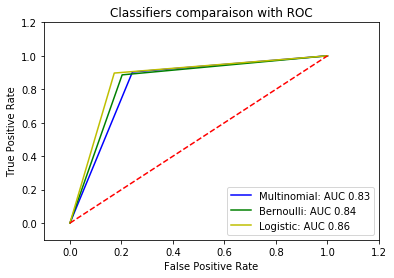

In [12]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.85      0.83      0.84     16385
   negative       0.88      0.90      0.89     23098

avg / total       0.87      0.87      0.87     39483



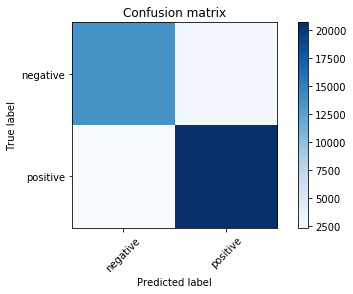

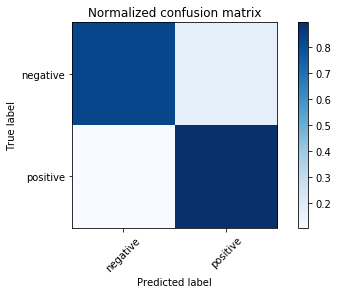

In [14]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks, set(Score), rotation=45)
    plt.yticks(tick_marks, set(Score))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()